In [ ]:
!nvidia-smi

Tue Aug 24 14:03:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict 💰📈

Let's write some TensorFlow code to predict the price of Bitcoin based on the historical price of Bitcoin.

⚠⚠⚠**Note:** This is not finacial advice.

Links:
* https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/
* https://www.coindesk.com/price/bitcoin


Further Reading about forecasting: 
https://otexts.com/fpp2/

## Get data

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we download the data here:

source: https://www.coindesk.com/price/bitcoin

The latest data this notebook use is 21/8/2021. If you want to update your data, just download from the source. 😎😎 

In [ ]:
!wget https://raw.githubusercontent.com/BaoLocPham/Tensorflow_Deep_Learning/main/Extras/BTC_USD_2013-10-01_2021-08-21-CoinDesk.csv

--2021-08-24 14:03:29--  https://raw.githubusercontent.com/BaoLocPham/Tensorflow_Deep_Learning/main/Extras/BTC_USD_2013-10-01_2021-08-21-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 183567 (179K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-08-21-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 179.26K  --.-KB/s    in 0.02s   

2021-08-24 14:03:29 (10.5 MB/s) - ‘BTC_USD_2013-10-01_2021-08-21-CoinDesk.csv.1’ saved [183567/183567]



In [ ]:
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

### Import data with pandas

In [ ]:
import pandas as pd

data_df = pd.read_csv("BTC_USD_2013-10-01_2021-08-21-CoinDesk.csv",
                      parse_dates=["Date"],
                      index_col=["Date"]) # data is overtime then why not set Date as index

data_df.head()

Currency  Closing Price (USD)  ...  24h High (USD)  24h Low (USD)
Date                                      ...                               
2013-10-01      BTC            123.65499  ...       124.75166      122.56349
2013-10-02      BTC            125.45500  ...       125.75850      123.63383
2013-10-03      BTC            108.58483  ...       125.66566       83.32833
2013-10-04      BTC            118.67466  ...       118.67500      107.05816
2013-10-05      BTC            121.33866  ...       121.93633      118.00566

[5 rows x 5 columns]

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2882 entries, 2013-10-01 to 2021-08-21
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2882 non-null   object 
 1   Closing Price (USD)  2882 non-null   float64
 2   24h Open (USD)       2882 non-null   float64
 3   24h High (USD)       2882 non-null   float64
 4   24h Low (USD)        2882 non-null   float64
dtypes: float64(4), object(1)
memory usage: 135.1+ KB


In [ ]:
# how many samples do we have?
len(data_df)

2882

In [ ]:
# what the lastest data in our data?
data_df.tail()

Currency  Closing Price (USD)  ...  24h High (USD)  24h Low (USD)
Date                                      ...                               
2021-08-17      BTC         46181.730824  ...    48048.744781   45694.801774
2021-08-18      BTC         44887.242787  ...    47137.389263   44460.220565
2021-08-19      BTC         44811.634126  ...    45986.584196   44346.485919
2021-08-20      BTC         46395.796696  ...    46855.579367   43990.922275
2021-08-21      BTC         49061.847721  ...    49333.938622   46631.140194

[5 rows x 5 columns]

In [ ]:
365*8

2920

Thanks to [coindesk](https://www.coindesk.com/price/bitcoin), they've collected the historical price of Bitcoin for the past ~ 8 years, which nearly 2920 samples.

Typically deep learning models usually like lots and lots of samples (where lots and lots can thousands to ten of thousands to millions).

A smaller number of sample is something you'll often run into with time series data problems.

>🔑**Note:** The **seasonality** of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has seasonality of daily value of 365 because the coin desk collect one sample per day.

### Types of time series


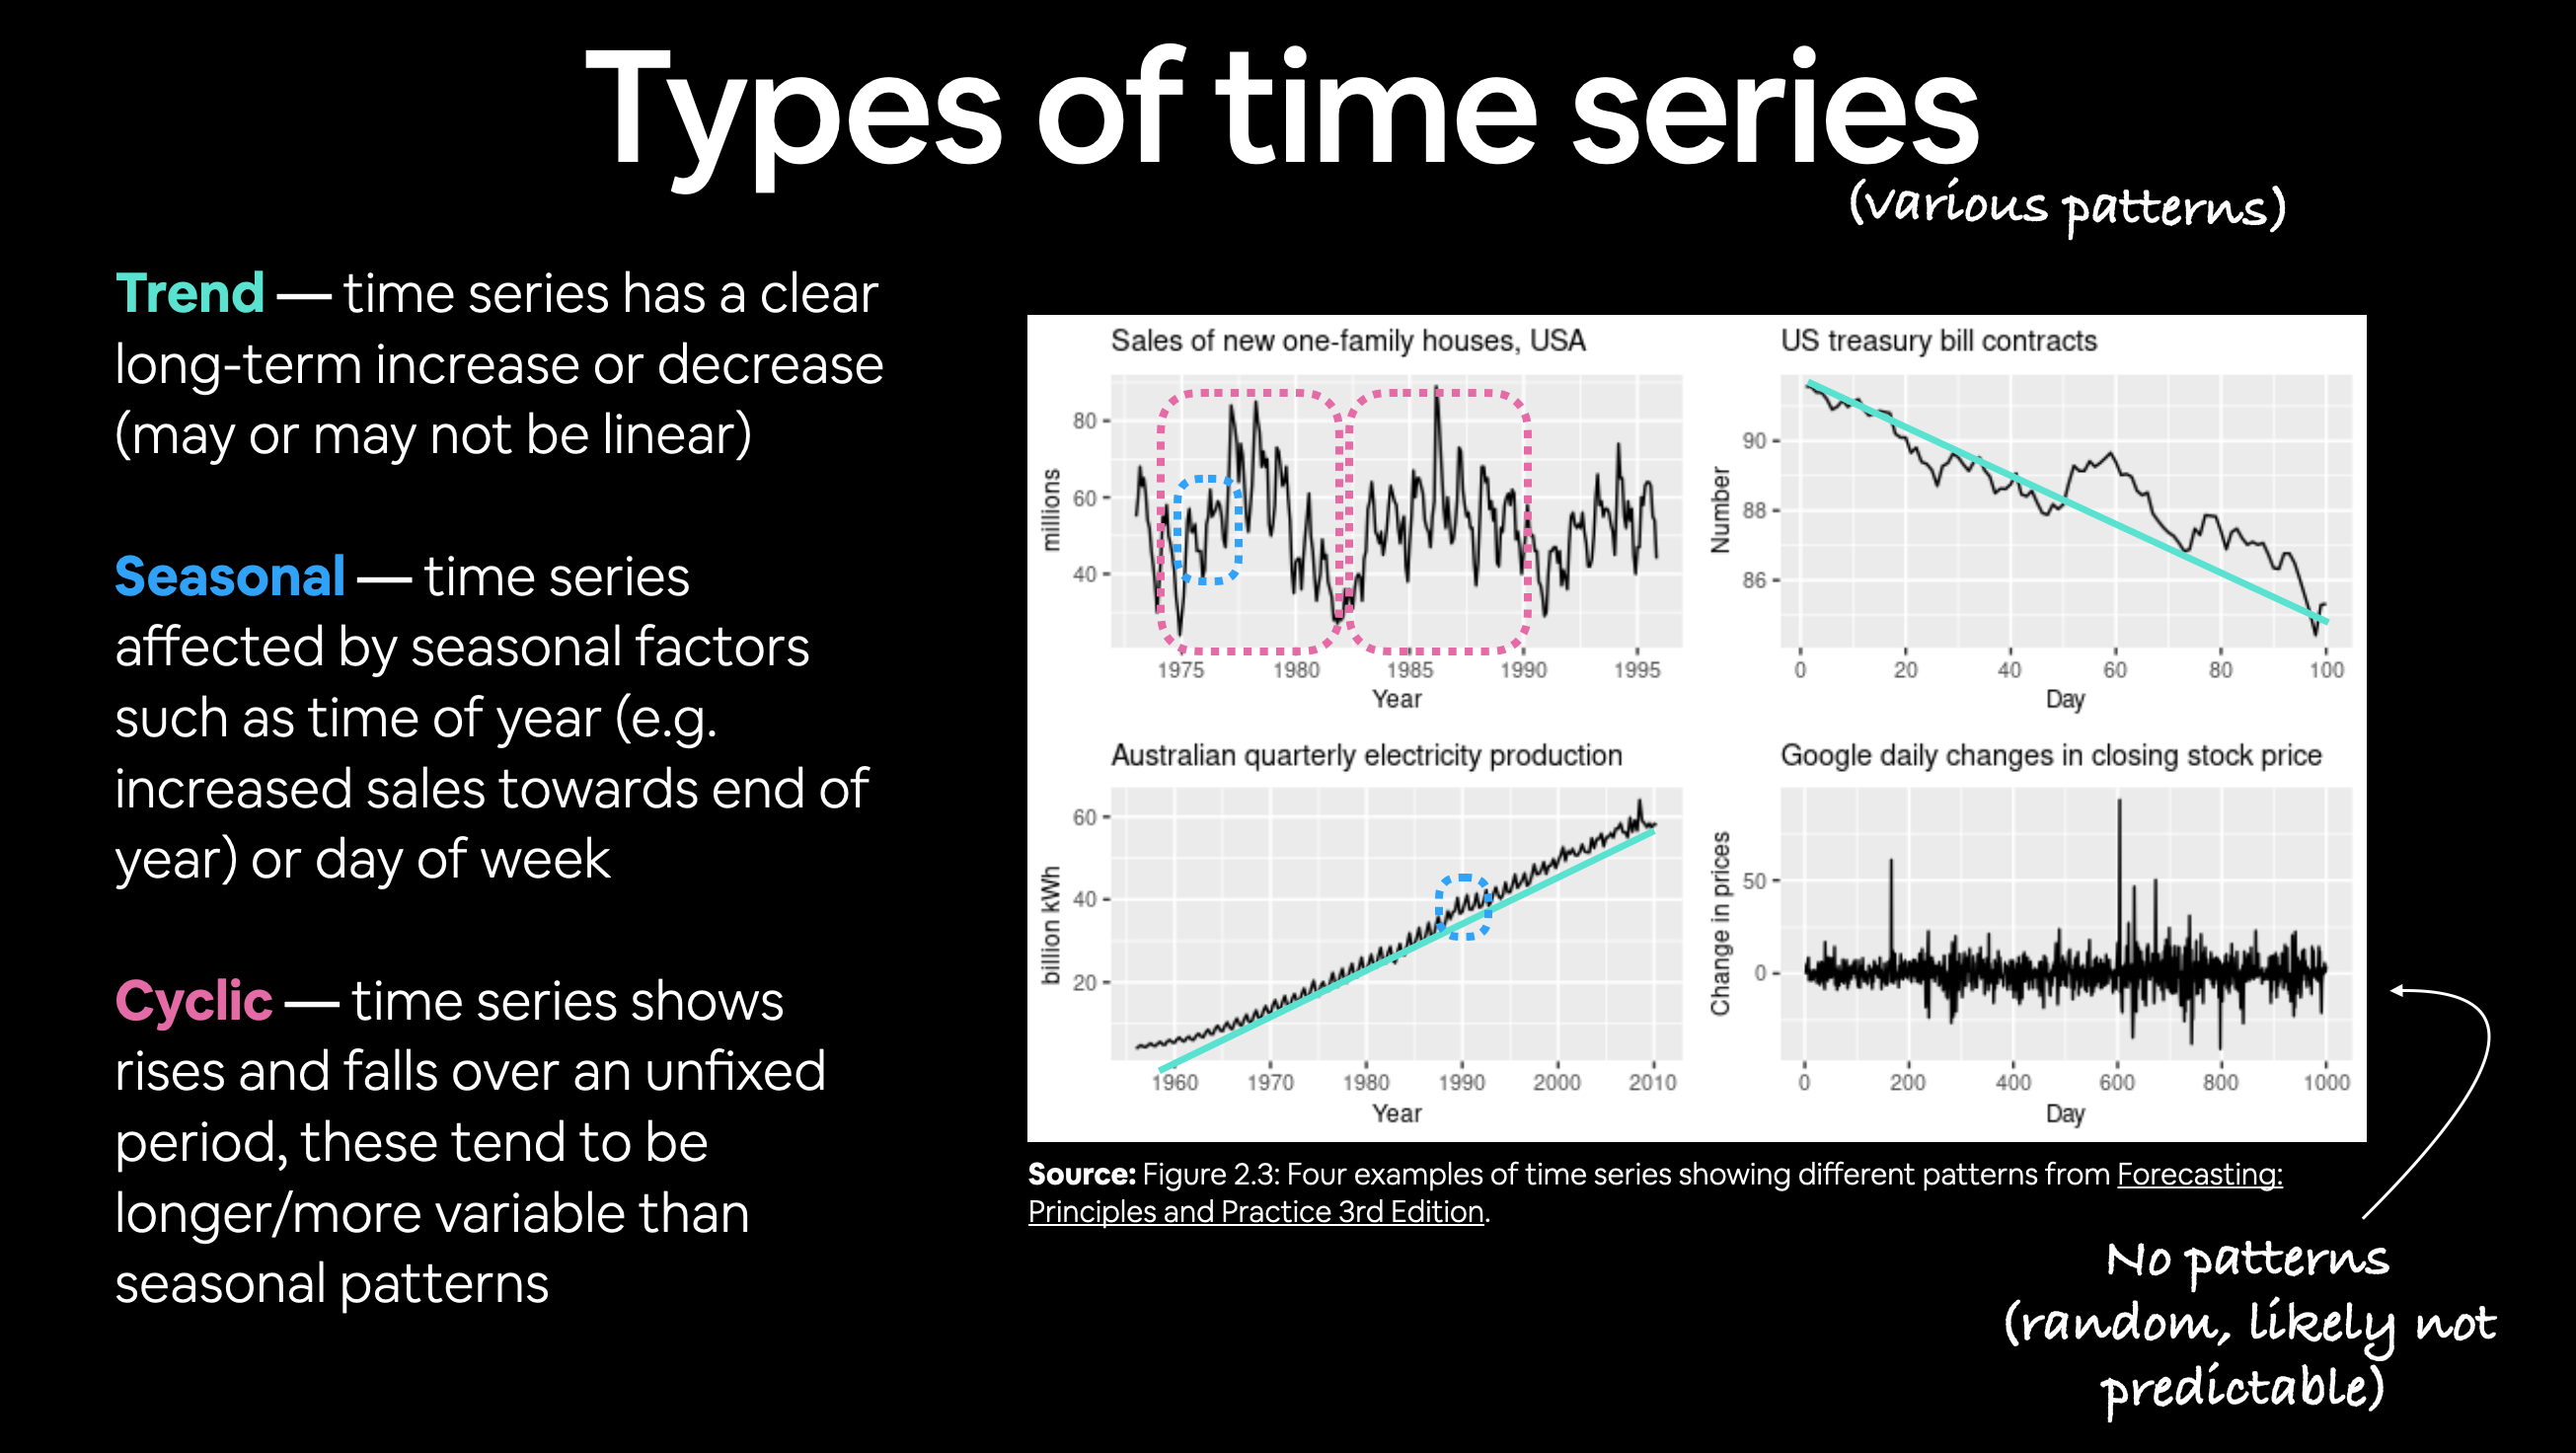


### Types of data

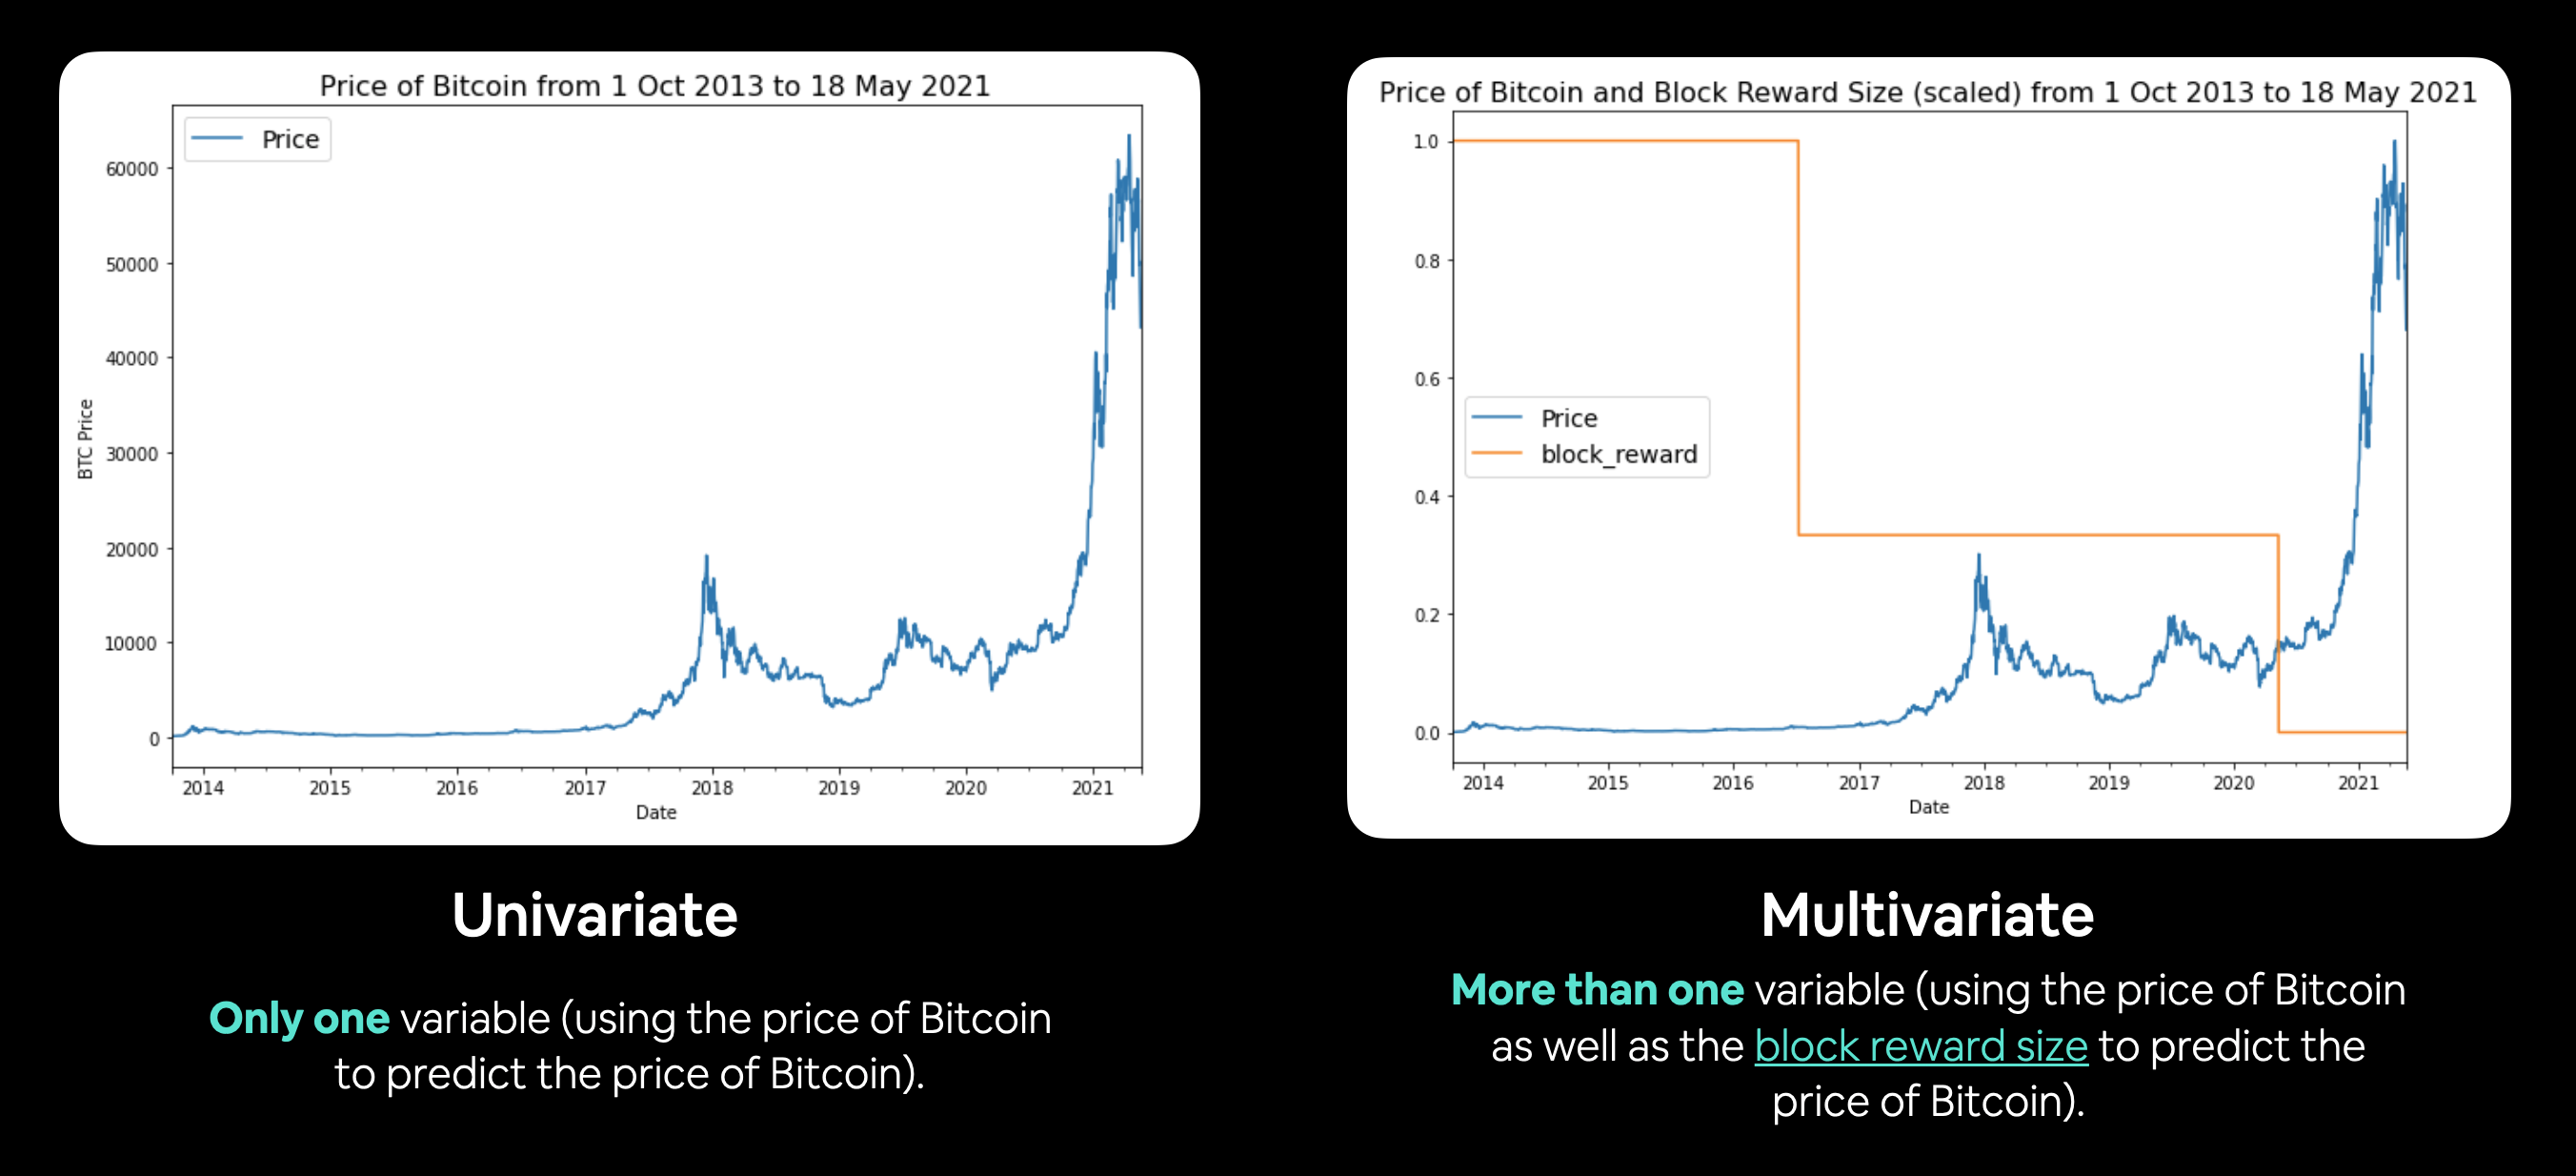

>🔑In our case, our data is univariate

## Analyse our data

In [ ]:
data_df.head()

Currency  Closing Price (USD)  ...  24h High (USD)  24h Low (USD)
Date                                      ...                               
2013-10-01      BTC            123.65499  ...       124.75166      122.56349
2013-10-02      BTC            125.45500  ...       125.75850      123.63383
2013-10-03      BTC            108.58483  ...       125.66566       83.32833
2013-10-04      BTC            118.67466  ...       118.67500      107.05816
2013-10-05      BTC            121.33866  ...       121.93633      118.00566

[5 rows x 5 columns]

We only want the `Date` and `Closing Price` of each date

In [ ]:
bitcoin_prices = pd.DataFrame(data_df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

Price
Date                 
2013-10-01  123.65499
2013-10-02  125.45500
2013-10-03  108.58483
2013-10-04  118.67466
2013-10-05  121.33866

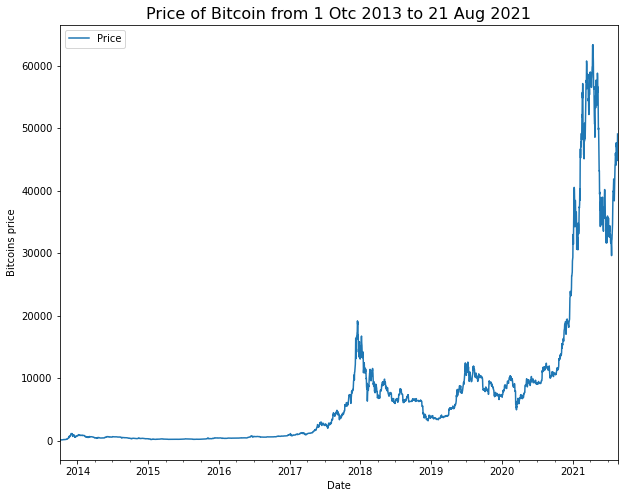

In [ ]:
# Plot our data
import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(10,8))
bitcoin_prices.plot(figsize=(10,8))
plt.ylabel("Bitcoins price")
plt.title("Price of Bitcoin from 1 Otc 2013 to 21 Aug 2021", fontsize=16)
plt.show()

### Create train and test sets for our time series data

#### The wrong way

In [ ]:
bitcoin_prices.head()

Price
Date                 
2013-10-01  123.65499
2013-10-02  125.45500
2013-10-03  108.58483
2013-10-04  118.67466
2013-10-05  121.33866

In [ ]:
# get bitcoins date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:5], prices[:5]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866]))

👎The wrong way to make train/test sets for time series data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # bitcoin prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2305,), (577,), (2305,), (577,))

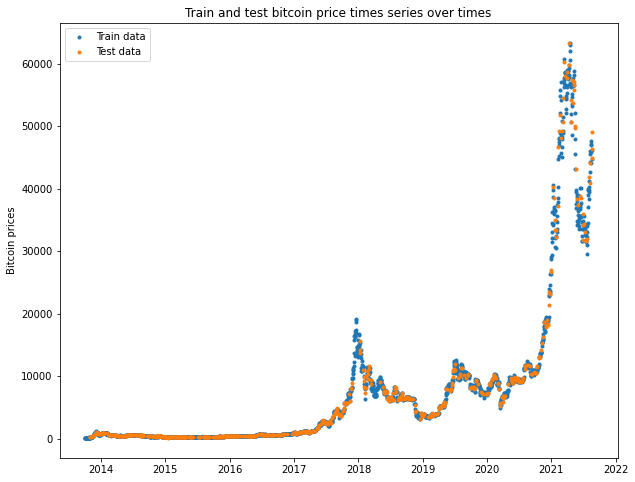

In [ ]:
# Let's plot the wrong train and test splits
plt.figure(figsize=(10,8))
plt.scatter(X_train, y_train,s=9, label="Train data")
plt.scatter(X_test, y_test, s=9,label="Test data")


plt.ylabel("Bitcoin prices")
plt.title("Train and test bitcoin price times series over times")
plt.legend()
plt.show()

#### The right way

You know why the above approach is wrong?

Well, because our model need to predict the future, so we need a way to simulate the future.

In this case, we can use the lastest data to ***replicate the future***. (**Pseudo Future** 🤣)

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(bitcoin_prices)) # 80% train 20% test data

#
X_train, y_train = timesteps[:split_size], prices[:split_size]
#
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2305, 577, 2305, 577)

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

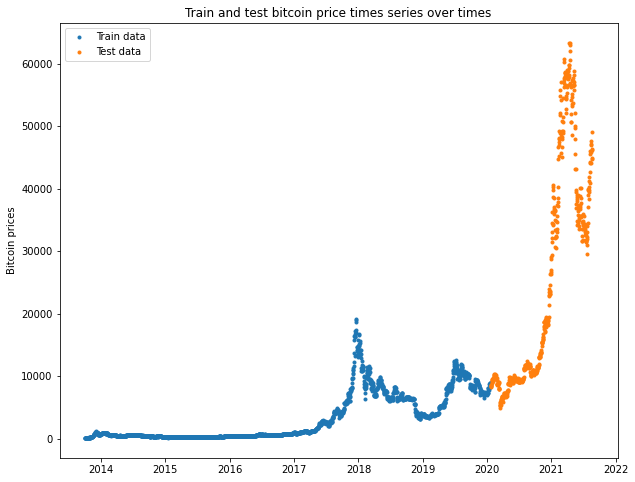

In [ ]:
# Let's plot the Right train and test splits
plt.figure(figsize=(10,8))
plt.scatter(X_train, y_train,s=9, label="Train data")
plt.scatter(X_test, y_test, s=9,label="Test data")


plt.ylabel("Bitcoin prices")
plt.title("Train and test bitcoin price times series over times")
plt.legend()
plt.show()

In [ ]:
# Create plotting function

def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plot timesteps (a series of points in time) against values (a series of values across timesteps)

  Args:
    timesteps: array of timestep values
    values: array of values across times
    format: style of plot, default .
    start: where to start the plot
    end: where to end the plot
    label: label to show on plot about value
  """
  # plot the series
  # plt.figure(figsize=(10,7))
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Bitcoin prices")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

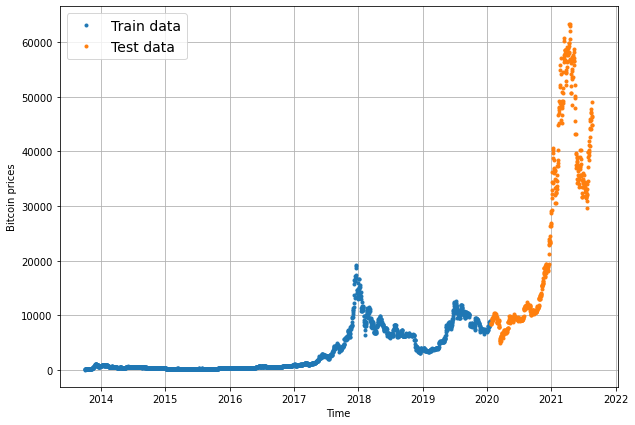

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(X_train, y_train, label="Train data")
plot_time_series(X_test, y_test, label="Test data")

## Modelling Experiments

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model perform best.

Terms to be familiar with:
* **Horizon** = number of timesteps into the futre we're going to predict.
* **Windown size** = number of timesteps we're going to use to predict the **Horizon**

Modelling experiments we're running:
* 0	Naïve model (baseline)
* 1	Dense model , horizon=1, windown size=7	
* 2	Same as 1 , horizon=1	, windown size=30	
* 3	Same as 1	, horizon=7	, windown size=30	
* 4	Conv1D	, horizon=1, windown size=7	
* 5	LSTM	, horizon=1, windown size=7	
* 6	Same as 1 (but with multivariate data)	, horizon=1, windown size=7	Block reward size
* 7	N-BEATs Algorithm	, horizon=1, windown size=7	
* 8	Ensemble (multiple models optimized on different loss functions)	, horizon=1, windown size=7	
* 9	Future prediction model (model to predict future values)	, horizon=1, windown size=7	
* 10	Same as 1 (but with turkey 🦃 data introduced)	, horizon=1, windown size=7	

## Model 0: Navie forecast (baseline)

The formula looks like this:
$\hat{y}_{t} = y_{t-1}$

In English:
> The prediction at timestep t ($\hat{y}_{t}$) is equal to the value at the time step ($y_{t-1}$)

In [ ]:
# Create a naive forecast
naive_forecast = y_test[:-1] # get all but the last one

len(naive_forecast), len(y_test)

(576, 577)

In [ ]:
naive_forecast[-10:] # get the last 10 elements

array([45576.88887965, 45793.31893432, 44078.76067268, 47654.72902173,
       47004.35746057, 47144.84256698, 46181.73082365, 44887.2427874 ,
       44811.63412599, 46395.79669554])

In [ ]:
y_test[-10:]

array([45793.31893432, 44078.76067268, 47654.72902173, 47004.35746057,
       47144.84256698, 46181.73082365, 44887.2427874 , 44811.63412599,
       46395.79669554, 49061.8477207 ])

You can see the last value in `y_test` is the $\hat{y}_{t}$ of the last value in `navie_forecast` $y_{t-1}$ 

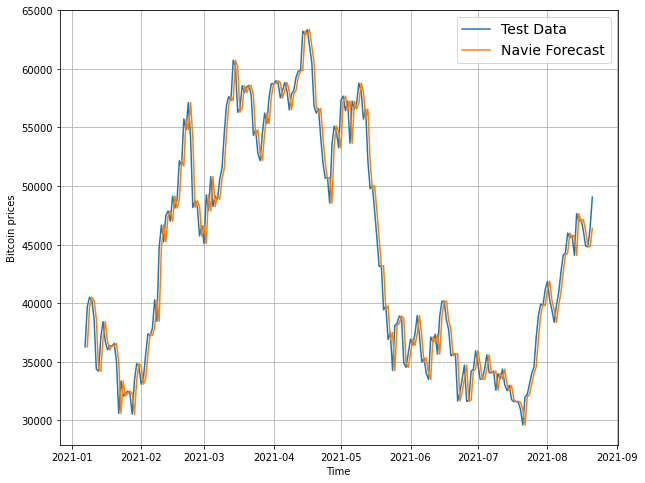

In [ ]:
# Plot the navie forcast
plt.figure(figsize=(10,8))
# plot_time_series(timesteps=X_train, values=y_train, label="Train Data")
plot_time_series(X_test, y_test, start=350, format="-", label="Test Data")
plot_time_series(X_test[1:], naive_forecast,start=350, label="Navie Forecast", format="-") 
# because we remove the last value in test set for Navie forecast

> 📖Read the simple forecasts chapter in Forecasting: Principles and Practices. And have a search to find out naive forecast is hard to beat. Doese the term autoregressive comes up.

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting. 

What we're doing?

We're predicting a number, so that mean we have a form of a regression problem. 

Then we'll need some regression-like metrics, a few common regression metrics (which can be use for time series forecastin):
* MAE - Mean Absolute Error
* MSE - Mean Square Error
* RMSE - Root Mean Square Error
* sMAPE - symmetric Mean Absolute Percentage Error
* MASE - Mean Absolute Scaled Error

The main thing we're evaluating here: how do our model's forecast $\hat{y}$ compare against the actual value $y_{true}$ or ground truth values.

Resouce: [Forecasting Priciples and Practices chapter 5.8](https://otexts.com/fpp3/accuracy.html)

#### The MASE

The numerator is the MAE of the `y_true` and `y_pred`, the demoninator is the MAE of the one step `naive forecast method`.

A scaled error:
* $>1$ if the forecast is worse than the naive.
* $<1$ if the forecast is better than the naive.

In [ ]:
import tensorflow as tf
import numpy as np


In [ ]:
# MASE implementations
def mean_absolute_scale_error(y_true, y_pred):
  """
  Implementation MASE (assuming no seasonality of the data).
  """
  mae = tf.reduce_mean(abs(y_true - y_pred))
  # Find MAE of naive forcast (no seasonality)
  mae_navie_no_season = tf.reduce_mean(abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1) 

  return mae/mae_navie_no_season

In [ ]:
  mean_absolute_scale_error(y_test[1:], y_pred=naive_forecast).numpy()
  # because the naive forecast is just basically shift all value to the right 1,
  # so when calculate the error we have to slice the y_test from 1

0.9988613853004277

#### The what ever you want

In [ ]:
def evaluate_preds(y_true, y_pred):
  """
  Evaluate preds base on these metrics:
  MAE - Mean Absolute Error
  MSE - Mean Square Error
  RMSE - Root Mean Square Error
  MASE - Mean Absolute Scaled Error
  """
  # Make sure using float32 (for metrics calculation precision)
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.cast(y_pred, tf.float32)

  # Calculate the metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scale_error(y_true, y_pred)

  return {
      "mae": mae.numpy(),
      "mse": mse.numpy(),
      "rmse": rmse.numpy(),
      "mape": mape.numpy(),
      "mase": mase.numpy()
  }

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 728.4441,
 'mape': 2.7126303,
 'mase': 0.99886143,
 'mse': 1516791.8,
 'rmse': 1231.581}

In [ ]:
y_test[:10], naive_forecast[:10]

(array([8635.07435696, 8384.08877677, 8451.23229602, 8347.56750541,
        8562.30747044, 8881.96239146, 9131.11498806, 9320.97840625,
        9545.07795659, 9388.88075189]),
 array([8635.07435696, 8384.08877677, 8451.23229602, 8347.56750541,
        8562.30747044, 8881.96239146, 9131.11498806, 9320.97840625,
        9545.07795659, 9388.88075189]))

In [ ]:
tf.reduce_mean(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=24523.98447822117>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

### Other models for baseline

Well, we're focused on TensorFlow and Deep learning models.

However there are plenty of other styles of time series forecasting models you want to experiment.

https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/

## Format data 2: Window dataset

Surely, we'd be ready to start building our model by now.

But we only one more steps to go.

What is window?

Windowing is a method to turn a series dataset into **Supervised learning problem**

In other words, we want to use windows of the past to predict the future.

For example for a univariate time series, windowing series (`window=7`) to predict the next single value (`horizon=1`)

Window for one week (univariate time series)
```
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

For the Bitcoin's price, it look like:
```
[123.654, 125.455, 108.584, 118.674, 121.338, 120.655, 121.795] -> [123.033]
[125.455, 108.584, 118.674, 121.338, 120.655, 121.795, 123.033] -> [124.049]
[108.584, 118.674, 121.338, 120.655, 121.795, 123.033, 124.049] -> [125.961]
```



Let's build some functions which take in a univariate time series and turn it into windows and horizons of specified sizes.

We'll start with the default horizon size of 1 and a window size of 7 (these aren't necessarily the best values to use, I've just picked them).

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# create function to label the data
def get_labeled_windows(x, horizon=1):
  """
  Create labels for winwow dataset

  E.g if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:,:-horizon], x[:,-horizon:]

In [ ]:
# Test our the window label function
test_window, test_label = get_labeled_windows(tf.expand_dims(tf.range(8)+1, axis=0))
print(f"Test windown: {tf.squeeze(test_window)} -> Label: {tf.squeeze(test_label)}")

Test windown: [1 2 3 4 5 6 7] -> Label: 8


Now we need to make window for entire series

Let's write a function which:

* Creates a window step of specific window size, for example: 

`[[0, 1, 2, 3, 4, 5, 6, 7]]`
* Uses NumPy indexing to create a 2D of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6, 7],
[1, 2, 3, 4, 5, 6, 7, 8],
[2, 3, 4, 5, 6, 7, 8, 9]]
```
* Uses the 2D array of multuple window steps to index on a target series
* Uses the get_labelled_windows() function we created above to turn the window steps into windows with a specified horizon

>📖**Resource:** The function created below has been adapted from Syafiq Kamarul Azman's article [Fast and Robust Sliding Window Vectorization with NumPy](https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5).

In [ ]:
# make_windows(prices)

In [ ]:
# np.expand_dims(np.arange(len(prices) - (WINDOW_SIZE+HORIZON-1)), axis=0).T + np.expand_dims(np.arange(8), axis=0)

In [ ]:
# len(prices)

In [ ]:
# Create function to view Numpy array as window
def make_windows(x, window_size=7, horizon=1):
  """
  Turn 1D array into 2D array of sequential windows of windows size.

  Args:
    x: the data
  
  Returns:
    windows , labels
  """
  # 1. Create window for a specific size (add the horizon at the end for labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step: {window_step}")

  # 2. Create 2D array of multiple window steps (minus 1 to account for indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis=0).T
  # print(f"Windows indexes: {windows_indexes}")

  # 3. Index on the target array (time series) with 2D array of multiple windows steps
  windowed_array = x[window_indexes]

  # 4. Get labelled windows
  windows, labels = get_labeled_windows(windowed_array, horizon=horizon)
  
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=7, horizon=1)
len(full_windows), len(full_labels)

(2875, 2875)

In [ ]:
# View the first 3 windows
for i in range(3):
  print(f"Windows: {full_windows[i]} -> Label: {full_labels[i]}")

Windows: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Windows: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Windows: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
# View the last 3 windows
for i in range(3):
  print(f"Windows: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Windows: [45793.31893432 44078.76067268 47654.72902173 47004.35746057
 47144.84256698 46181.73082365 44887.2427874 ] -> Label: [44811.63412599]
Windows: [44078.76067268 47654.72902173 47004.35746057 47144.84256698
 46181.73082365 44887.2427874  44811.63412599] -> Label: [46395.79669554]
Windows: [47654.72902173 47004.35746057 47144.84256698 46181.73082365
 44887.2427874  44811.63412599 46395.79669554] -> Label: [49061.8477207]


>🔑**Note:** There's a function which does similar to the above in `tf.keras.preprocessing`, an extension could be try and replicate what we've done using the premade function:
https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

In [ ]:
tf_data = tf.keras.preprocessing.timeseries_dataset_from_array(prices,
                                                               prices[6:].T,
                                                               sequence_length=7,
                                                               batch_size=2)
iterator = iter(tf_data)
print(f"data :{iterator.next()}")

data :(<tf.Tensor: shape=(2, 7), dtype=float64, numpy=
array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ]])>, <tf.Tensor: shape=(2,), dtype=float64, numpy=array([121.795, 123.033])>)


### Turning windows into train and test data 

In [ ]:
def make_train_test_split(windows, labels, test_split=0.2):
  """
  Splits match pairs of windows and labels into train and test set
  """
  split_size = int(len(windows) * (1-test_split))

  train_windows = windows[:split_size]
  train_labels = labels[:split_size]

  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows=full_windows, labels=full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2300, 575, 2300, 575)

## Create model checkpoint

In [ ]:
import os
import tensorflow as tf

SAVE_PATH = "model_experiments"
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                            # monitor="val_accuracy",
                                            save_best_only=True,
                                            verbose=0,
                                            # save_weights_only=True,
                                            save_freq="epoch")

In [ ]:
# import shutil

# shutil.rmtree("model_experiments/model_1_dense")

## Model 1: Dense model (window=7, horizon=1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLu.
* Output layer with linear activation (no activation).
* Adam optimization and MAE loss function.
* Batch size of 128. (because the data is quite simple)
* 100 epochs.

Why these value?

* **Hyperparameters** = value a machine learning practioner (you!) can adjust themselves.
* **Parameters** = values a model learn on its own.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# set random seed
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_1_dense")

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae", "mse"]
)

In [ ]:
model_1_history = model_1.fit(x=train_windows, 
                              y=train_labels,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint("model_1_dense")],
                              epochs=100)

Epoch 1/100
18/18 [==============================] - 3s 11ms/step - loss: 799.4224 - mae: 799.4224 - mse: 2268770.0000 - val_loss: 3042.8049 - val_mae: 3042.8049 - val_mse: 19020380.0000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 276.1559 - mae: 276.1559 - mse: 324076.2812 - val_loss: 1270.2147 - val_mae: 1270.2147 - val_mse: 4508015.0000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 199.5974 - mae: 199.5974 - mse: 188027.4844 - val_loss: 1272.2489 - val_mae: 1272.2489 - val_mse: 4226025.5000
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 173.6117 - mae: 173.6117 - mse: 154639.1094 - val_loss: 1173.5354 - val_mae: 1173.5354 - val_mse: 3632166.5000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 5/100
18/18 [====================

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 736.5150 - mae: 736.5150 - mse: 1549705.1250


[736.5149536132812, 736.5149536132812, 1549705.125]

In [ ]:
# Load in the best checkpoint model_1
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 735.9026 - mae: 735.9026 - mse: 1544236.1250


[735.9026489257812, 735.9026489257812, 1544236.125]

## Making forecast with a model

To make "forecasts" on the test dataset (this is just peusudo forecast), let's write function to:

1. Takes in a train model.
2. Takes in some input data (same kind of data that model is trained on).
3. Pass the input into the model.
4. Return the prediction.

In [ ]:
def make_preds(model, input_data):
  """
  Use model to make predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)

In [ ]:
y_test.shape, model_1_preds.shape

((577,), TensorShape([575]))

In [ ]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_1_preds)
model_1_results

{'mae': 735.9027,
 'mape': 2.7693985,
 'mase': 1.0074952,
 'mse': 1544236.0,
 'rmse': 1242.673}

In [ ]:
naive_results

{'mae': 728.4441,
 'mape': 2.7126303,
 'mase': 0.99886143,
 'mse': 1516791.8,
 'rmse': 1231.581}

👀Look likes `model_1` nearly beats the `naive model`

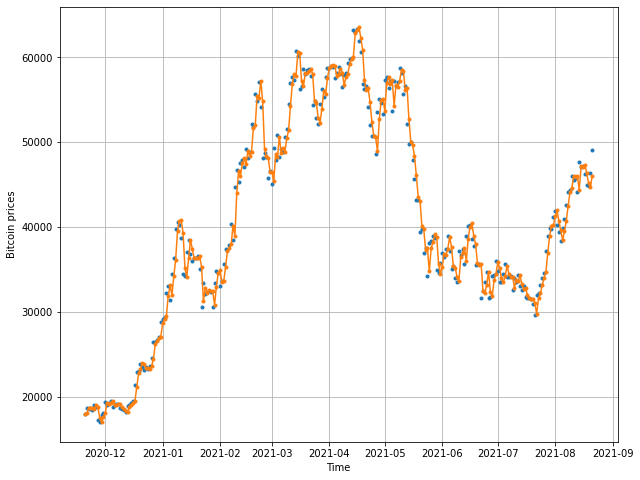

In [ ]:
# Let's plot our model prediction

offset = 300
plt.figure(figsize=(10,8))
## 
plot_time_series(X_test[-len(test_windows):], test_labels[:,0], start=offset)
plot_time_series(X_test[-len(test_windows):], model_1_preds,format=".-", start=offset)
# len(y_test), len(model_1_preds)

In [ ]:
test_labels.shape, model_1_preds.shape

((575, 1), TensorShape([575]))

## Model 2: Dense model (window=30, horizon=1)

#### Recreate data

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=30, horizon=1)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

In [ ]:
train_windows.shape, train_labels.shape

((2281, 30), (2281, 1))

#### Create and train model

Model 2 is the same architecture and same hyperparameters as Model 1

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set the random seed
tf.random.set_seed(42)

# 1. Create model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

# 2. Compile the model
model_2.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae", "mse"]
)

In [ ]:
model_2_history = model_2.fit(x=train_windows,
                              y=train_labels,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              epochs=100,
                              callbacks=[create_model_checkpoint("model_2_dense")])

Epoch 1/100
18/18 [==============================] - 0s 9ms/step - loss: 1065.7045 - mae: 1065.7045 - mse: 4293504.0000 - val_loss: 3195.2297 - val_mae: 3195.2297 - val_mse: 23207186.0000
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 398.9356 - mae: 398.9356 - mse: 670401.3750 - val_loss: 1955.7321 - val_mae: 1955.7321 - val_mse: 10228231.0000
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 253.7126 - mae: 253.7126 - mse: 287866.5312 - val_loss: 1502.0692 - val_mae: 1502.0692 - val_mse: 5983900.0000
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 212.9106 - mae: 212.9106 - mse: 203779.9531 - val_loss: 1585.7366 - val_mae: 1585.7366 - val_mse: 5631074.5000
Epoch 5/100
18/18 [==================

In [ ]:
# evaluate the model on full test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 855.9193 - mae: 855.9193 - mse: 1904155.3750


[855.9193115234375, 855.9193115234375, 1904155.375]

In [ ]:
# load the best perform check point 
model_2 = tf.keras.models.load_model(SAVE_PATH+"/model_2_dense")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 779.6948 - mae: 779.6948 - mse: 1672419.6250


[779.69482421875, 779.69482421875, 1672419.625]

In [ ]:
model_2_preds = make_preds(model_2, test_windows)

In [ ]:
model_2_preds.shape, test_labels.shape

(TensorShape([571]), (571, 1))

In [ ]:
model_2_results = evaluate_preds(y_true=test_labels[:,0], y_pred=model_2_preds)
model_2_results

{'mae': 779.6948,
 'mape': 2.9369612,
 'mase': 1.0622586,
 'mse': 1672419.5,
 'rmse': 1293.2206}

In [ ]:
model_1_results

{'mae': 735.9027,
 'mape': 2.7693985,
 'mase': 1.0074952,
 'mse': 1544236.0,
 'rmse': 1242.673}

In [ ]:
naive_results

{'mae': 728.4441,
 'mape': 2.7126303,
 'mase': 0.99886143,
 'mse': 1516791.8,
 'rmse': 1231.581}

😿`model_2` is perform worse than the `naive model`

## Model 3: Dense model (window=30, horizon=7)

#### Recreate data

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=30, horizon=7)

train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

train_windows.shape, train_labels.shape

((2276, 30), (2276, 7))

#### Create and train model

In [ ]:
HORIZON = 7

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# 1. Create model
inputs = layers.Input(shape=(30,), name="input_layer")

x = layers.Dense(128, activation="relu")(inputs)

outputs = layers.Dense(HORIZON)(x) # horizon = 7

model_3 = tf.keras.Model(inputs, outputs, name="model_3_dense")

# 2. Compile the model
model_3.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae","mse"]
)

In [ ]:
model_3_history = model_3.fit(x=train_windows,
                              y=train_labels,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              epochs=100,
                              callbacks=[create_model_checkpoint("model_3_dense")])

Epoch 1/100
18/18 [==============================] - 0s 9ms/step - loss: 1714.9612 - mae: 1714.9612 - mse: 12631586.0000 - val_loss: 5173.1602 - val_mae: 5173.1602 - val_mse: 72813888.0000
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 553.6696 - mae: 553.6696 - mse: 1294770.0000 - val_loss: 3000.0757 - val_mae: 3000.0757 - val_mse: 23041740.0000
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 421.7407 - mae: 421.7407 - mse: 814400.8750 - val_loss: 2718.3137 - val_mae: 2718.3137 - val_mse: 18754772.0000
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 381.0112 - mae: 381.0112 - mse: 667994.4375 - val_loss: 2585.8391 - val_mae: 2585.8391 - val_mse: 16753015.0000
INFO:tensorflow:Assets written to

In [ ]:
# evaluate on full test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1630.3069 - mae: 1630.3069 - mse: 7368581.5000


[1630.306884765625, 1630.306884765625, 7368581.5]

In [ ]:
# load in the best checkpoint
model_3 = tf.keras.models.load_model(SAVE_PATH+"/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1589.1859 - mae: 1589.1859 - mse: 7330516.0000


[1589.1859130859375, 1589.1859130859375, 7330516.0]

In [ ]:
model_3_preds = model_3.predict(test_windows)

model_3_results = evaluate_preds(y_true=test_labels[:,], y_pred=model_3_preds)

In [ ]:
model_3_preds.shape, test_labels.shape

((570, 7), (570, 7))

In [ ]:
model_3_results # seem didn't workout in large dimension

{'mae': array([  297.22055 ,   389.55356 ,   507.29868 ,   795.1554  ,
          798.91125 ,   606.7321  ,   380.97113 ,   227.01646 ,
          174.05539 ,   174.06389 ,   188.91881 ,   278.56683 ,
          353.3521  ,   649.2958  ,   468.1843  ,   462.7108  ,
          350.0777  ,   247.33371 ,   244.42117 ,   315.11246 ,
          362.37402 ,   541.65137 ,   636.18304 ,   809.71375 ,
          490.10254 ,   249.17076 ,   179.69852 ,   379.78012 ,
          231.58524 ,   427.7687  ,   530.85675 ,   640.18976 ,
          977.63824 ,  1004.7118  ,   744.226   ,   348.67062 ,
          157.22252 ,   162.7892  ,   272.47418 ,   310.11642 ,
          432.69037 ,   472.05392 ,   608.4209  ,  1084.7996  ,
         1666.9596  ,  2157.1555  ,  2025.252   ,  2056.425   ,
         2317.9153  ,  2602.7065  ,  1276.7673  ,   520.2884  ,
          462.86057 ,   354.72748 ,   409.69135 ,   381.34814 ,
          583.79376 ,   212.44029 ,   231.20383 ,   317.23346 ,
          409.17117 ,   368.12103

### Make evaluation function work on larger horizons

In [ ]:
model_3_preds.shape, model_2_preds.shape

((570, 7), TensorShape([571]))

In [ ]:
model_3_preds.ndim, model_2_preds.ndim

(2, 1)

In [ ]:
def evaluate_preds(y_true, y_pred):
  """
  Evaluate preds base on these metrics:
  MAE - Mean Absolute Error
  MSE - Mean Square Error
  RMSE - Root Mean Square Error
  MASE - Mean Absolute Scaled Error
  """
  # Make sure using float32 (for metrics calculation precision)
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.cast(y_pred, tf.float32)

  # Calculate the metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scale_error(y_true, y_pred)
  
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {
      "mae": mae.numpy(),
      "mse": mse.numpy(),
      "rmse": rmse.numpy(),
      "mape": mape.numpy(),
      "mase": mase.numpy()
  }

In [ ]:
model_3_results = evaluate_preds(y_true=test_labels, y_pred=model_3_preds)
model_3_results

{'mae': 1589.1859,
 'mape': 5.92021,
 'mase': 2.1813612,
 'mse': 7330516.0,
 'rmse': 1810.9487}

In [ ]:
naive_results

{'mae': 728.4441,
 'mape': 2.7126303,
 'mase': 0.99886143,
 'mse': 1516791.8,
 'rmse': 1231.581}

😥😥😥 `model_3` is perform the worst so far.

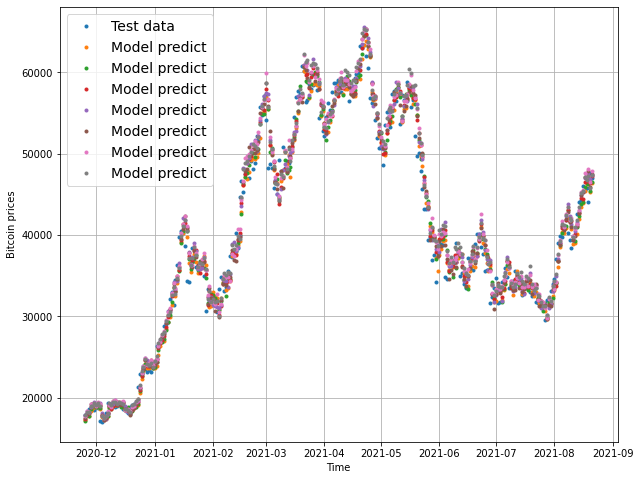

In [ ]:
# Plot the predictions 
offset = 300
plt.figure(figsize=(10,8))

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset,format=".", label="Model predict")

In [ ]:
X_test[-len(test_windows):].shape, X_test.shape, test_labels.shape

((570,), (577,), (570, 7))

In [ ]:
model_3_preds[0], tf.reduce_mean(model_3_preds[0])

(array([8688.632, 8816.471, 8872.306, 8874.124, 8898.326, 8953.745,
        8940.505], dtype=float32),
 <tf.Tensor: shape=(), dtype=float32, numpy=8863.443>)

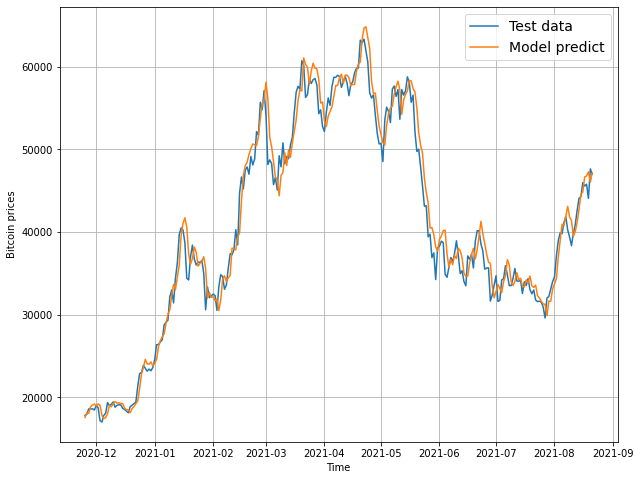

In [ ]:
# Plot the predictions 
offset = 300
plt.figure(figsize=(10,8))

plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:,0], 
                 start=offset, 
                 format="-",
                 label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 start=offset,
                 format="-", 
                 label="Model predict")

## Comparing our experiments so far

In [ ]:
import pandas as pd

results_df = pd.DataFrame({"model_0_naive": naive_results,
                           "model_1":model_1_results,
                           "model_2":model_2_results,
                           "model_3": model_3_results})
results_df = results_df.transpose()
results_df.head()

mae         mse         rmse      mape      mase
model_0_naive   728.444092  1516791.75  1231.581055  2.712630  0.998861
model_1         735.902710  1544236.00  1242.672974  2.769398  1.007495
model_2         779.694824  1672419.50  1293.220581  2.936961  1.062259
model_3        1589.185913  7330516.00  1810.948730  5.920210  2.181361

Text(0.5, 1.0, 'MASE on our model experiments')

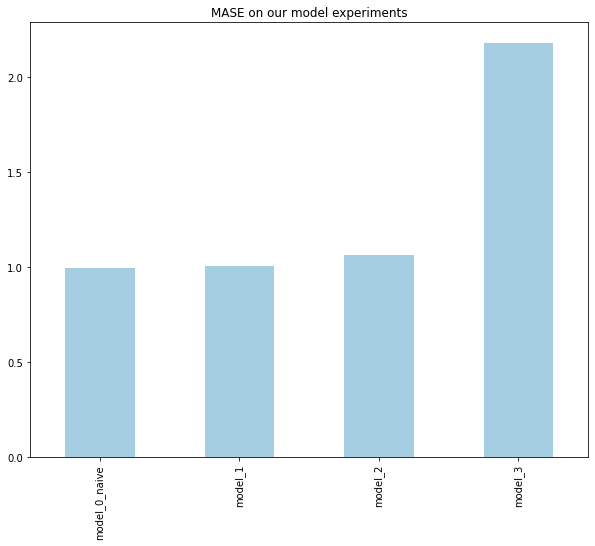

In [ ]:

plt.figure(figsize=(10, 8))
# results_df["mase"].plot(kind="barh", color="")
results_df["mase"].plot(kind="bar", colormap='Paired')
plt.title("MASE on our model experiments")

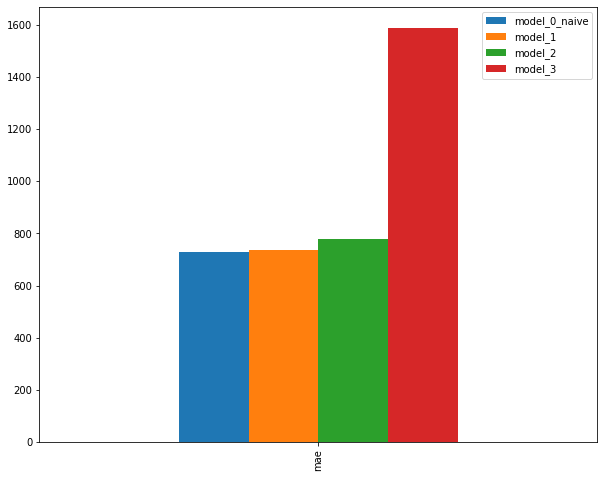

In [ ]:
results_mae_df = pd.DataFrame({"model_0_naive": naive_results["mae"],
                           "model_1":model_1_results["mae"],
                           "model_2":model_2_results["mae"],
                           "model_3": model_3_results["mae"]}, index=["mae"])
results_mae_df.plot(kind="bar", figsize=(10,8))

In [ ]:
results_mae_df

model_0_naive    model_1     model_2      model_3
mae     728.444092  735.90271  779.694824  1589.185913

🔑 Note: You might be wondering, why are the naïve results so good? One of the reasons could be due the presence of **autocorrelation** in the data. If a time series has **autocorrelation** it means the value at `t+1` (the next timestep) is typically close to the value at `t` (the current timestep). In other words, today's value is probably pretty close to yesterday's value. Of course, this isn't always the case but when it is, a naïve model will often get fairly good results.

📖 Resource: For more on how autocorrelation influences a model's predictions, see the article How (not) to use Machine Learning for time series forecasting: [Avoiding the pitfalls](https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424) by Vegard Flovik

## Model 4: Conv1D

#### Recreate data


In [ ]:
HORIZON = 1 
WINDOW_SIZE = 7

In [ ]:
# Create windowed data
full_windows, full_labels = make_windows(prices, 
                                         window_size=WINDOW_SIZE,
                                          horizon=HORIZON)

len(full_windows), len(full_labels)

(2875, 2875)

In [ ]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows,
                                                                               full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2300, 575, 2300, 575)

To use the Conv1D we need an input shape of: `(batch_size, timesteps, input_dim)`

But our data don't have that yet.


In [ ]:
# check data input shape
train_windows[0].shape # return WINDOW_SIZE

(7,)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it work
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [ ]:
# Test our lambda layer
print(f"Original shape :{x.shape}") # Window size
print(f"Expanded shape:{expand_dims_layer(x).shape}") 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape :(7,)
Expanded shape:(7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


#### Create model

* Lamda layer.
* ConV1D layer, 128 filters, kernel_size=..., padding=...
* Output layer Dense.
 

In [ ]:
HORIZON = 1 
WINDOW_SIZE = 7

In [ ]:
# 1. Create model
inputs = layers.Input(shape=(WINDOW_SIZE), name="input_layer")

x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)

x = layers.Conv1D(filters=128,
                  kernel_size=5,
                  padding="causal")(x)
outputs = layers.Dense(HORIZON)(x)

model_4 = tf.keras.Model(inputs, outputs, name="model_4_conv1d")

In [ ]:
# model_4 = tf.keras.Sequential([
#   layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
#   layers.Conv1D(128, 5, padding="causal"), # useful in temporal data like this
#   layers.Dense(HORIZON)
# ], name="model_4_conv1d")

In [ ]:
# Compile the model
model_4.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae","mse"]
)

In [ ]:
model_4_history = model_4.fit(x=train_windows,
                              y=train_labels,
                              epochs=100,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint("model_4_conv1d")])

Epoch 1/100
72/72 [==============================] - 29s 6ms/step - loss: 401.9022 - mae: 401.9022 - mse: 899395.8125 - val_loss: 1437.6884 - val_mae: 1437.6884 - val_mse: 5708441.0000
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
Epoch 2/100
72/72 [==============================] - 0s 4ms/step - loss: 198.8626 - mae: 198.8626 - mse: 191903.4531 - val_loss: 1545.2841 - val_mae: 1545.2841 - val_mse: 5240612.0000
Epoch 3/100
72/72 [==============================] - 0s 3ms/step - loss: 184.7040 - mae: 184.7040 - mse: 158672.9062 - val_loss: 1641.3933 - val_mae: 1641.3933 - val_mse: 5570176.0000
Epoch 4/100
72/72 [==============================] - 0s 4ms/step - loss: 173.3469 - mae: 173.3469 - mse: 135187.4062 - val_loss: 1055.2656 - val_mae: 1055.2656 - val_mse: 2713859.0000
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
Epoch 5/100
72/72 [==============================] - 0s 4ms/step - loss: 150.6234 - mae: 150.6234 - mse: 110121.7

In [ ]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 7)]               0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 1, 7)              0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1, 128)            4608      
_________________________________________________________________
dense_6 (Dense)              (None, 1, 1)              129       
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate the model on the whole test windows
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 835.4376 - mae: 835.4376 - mse: 1771354.5000


[835.4376220703125, 835.4376220703125, 1771354.5]

In [ ]:
# load the best perform checkpoint
model_4 = tf.keras.models.load_model(filepath=f"{SAVE_PATH}/{model_4.name}")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 728.3397 - mae: 728.3397 - mse: 1524460.7500


[728.3396606445312, 728.3396606445312, 1524460.75]

In [ ]:
# model_4_preds.shape, test_labels.shape

In [ ]:
model_4_preds = make_preds(model_4, test_windows)
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_4_preds)
model_4_results

{'mae': 728.3396,
 'mape': 2.7188308,
 'mase': 0.9971408,
 'mse': 1524460.8,
 'rmse': 1234.6906}

In [ ]:
naive_results

{'mae': 728.4441,
 'mape': 2.7126303,
 'mase': 0.99886143,
 'mse': 1516791.8,
 'rmse': 1231.581}

🔑well, our `Conv1D model` nearly beats the `naive model`

## Model 5: RNN (LSTM)

In [ ]:
# set random seed 
tf.random.set_seed(42)

# 1. Create model
inputs = layers.Input(shape=(WINDOW_SIZE), name="input_layer")

x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x) # default param
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs, outputs, name="model_5_LSTM")
# 2. Compile the model
model_5.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae","mse"]
)
# 3. Train the model
model_5_history = model_5.fit(x=train_windows,
                              y=train_labels,
                              epochs=100,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_5.name)])

Epoch 1/100
72/72 [==============================] - 2s 8ms/step - loss: 946.8704 - mae: 946.8704 - mse: 4124937.0000 - val_loss: 1277.4358 - val_mae: 1277.4358 - val_mse: 4588032.5000
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 2/100
72/72 [==============================] - 0s 6ms/step - loss: 183.7758 - mae: 183.7758 - mse: 164752.1094 - val_loss: 1235.1006 - val_mae: 1235.1006 - val_mse: 4124797.0000
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 3/100
72/72 [==============================] - 0s 5ms/step - loss: 176.2531 - mae: 176.2531 - mse: 158306.0781 - val_loss: 1294.8008 - val_mae: 1294.8008 - val_mse: 4137881.5000
Epoch 4/100
72/72 [==============================] - 0s 5ms/step - loss: 171.8899 - mae: 171.8899 - mse: 152005.6094 - val_loss: 1192.8717 - val_mae: 1192.8717 - val_mse: 3724397.0000
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 5/100
72/72 [=========================

In [ ]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 753.9731 - mae: 753.9731 - mse: 1577672.2500


[753.9730834960938, 753.9730834960938, 1577672.25]

In [ ]:
model_5 = tf.keras.models.load_model(filepath=f"{SAVE_PATH}/{model_5.name}")
model_5_preds = model_5.predict(test_windows)
model_5_results = evaluate_preds(y_true=test_labels, y_pred=model_5_preds)

In [ ]:
model_5_results

{'mae': 735.4117,
 'mape': 2.744271,
 'mase': 1.006823,
 'mse': 1546918.4,
 'rmse': 735.4117}

In [ ]:
naive_results

{'mae': 728.4441,
 'mape': 2.7126303,
 'mase': 0.99886143,
 'mse': 1516791.8,
 'rmse': 1231.581}

In [ ]:
model_1_results

{'mae': 735.9027,
 'mape': 2.7693985,
 'mase': 1.0074952,
 'mse': 1544236.0,
 'rmse': 1242.673}

🔑**Note:** Just because neural networks are such powerful algorithms, they can be used to almost any problem, however, that doesn't mean they'll achive performant or usable results.

## Make multivariate time series dataset

Before add feature to time series, what is a feature we can use?

How about Bitcoin halving event?

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [ ]:
# Let's make a multivariate time series
bitcoin_prices.head()

Price
Date                 
2013-10-01  123.65499
2013-10-02  125.45500
2013-10-03  108.58483
2013-10-04  118.67466
2013-10-05  121.33866

In [ ]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (it start from 1 Otober 2013)
block_reward_2 = 25 # 8 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-08")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

>**Note:** We're going to get the days (indexes) for different blocks reward values.
This is important, if we're going to use multiple variables values for our time series, they have to the same frequency as original variable.(e.g If bitcoin prices are daily, we need the block reward values to be daily as well).

In [ ]:
# Get date indexes for add in different blocks dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(1012, 2421)

Now we can add another feature to our dataset `block_reward` (this gets lower overtime so it may lead to increase prices of bitcoin)

In [ ]:
# Add block reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column 
bitcoin_prices_block["block_reward"].iloc[:block_reward_2_days] = block_reward_2
bitcoin_prices_block["block_reward"].iloc[block_reward_2_days:block_reward_3_days] = block_reward_3
bitcoin_prices_block["block_reward"].iloc[block_reward_3_days:] = block_reward_4

# another version
# bitcoin_prices_block.iloc[:block_reward_2_days,-1] = block_reward_2
# bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1] = block_reward_3
# bitcoin_prices_block.iloc[block_reward_3_days:,-1] = block_reward_4

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
bitcoin_prices_block.head()

Price block_reward
Date                              
2013-10-01  123.65499           25
2013-10-02  125.45500           25
2013-10-03  108.58483           25
2013-10-04  118.67466           25
2013-10-05  121.33866           25

In [ ]:
bitcoin_prices_block.tail()

Price block_reward
Date                                 
2021-08-17  46181.730824         6.25
2021-08-18  44887.242787         6.25
2021-08-19  44811.634126         6.25
2021-08-20  46395.796696         6.25
2021-08-21  49061.847721         6.25

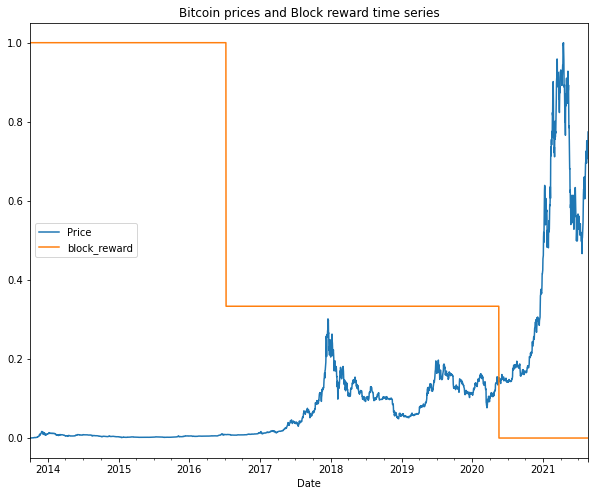

In [ ]:
# Let's see what it look like
# Note: Because of the different scales of our values we need to scale them to be between 0 and 1
from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10,8))
plt.title("Bitcoin prices and Block reward time series")
plt.show()

#### Making a windowed dataset with pandas

When we add another variable to our dataset, these function won't work.

Since our data is a pandas DataFrame, we can leverage the `pandas.DataFrame.shift()` method to create a windowed **Multivariate** time series.

The `shift()` method offsets an index by a specified number of periods.


In [ ]:
# Set up dataset hyperparamets
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns:
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

Price block_reward    Price+1  ...    Price+5    Price+6    Price+7
Date                                           ...                                 
2013-10-01  123.65499           25        NaN  ...        NaN        NaN        NaN
2013-10-02  125.45500           25  123.65499  ...        NaN        NaN        NaN
2013-10-03  108.58483           25  125.45500  ...        NaN        NaN        NaN
2013-10-04  118.67466           25  108.58483  ...        NaN        NaN        NaN
2013-10-05  121.33866           25  118.67466  ...        NaN        NaN        NaN
2013-10-06  120.65533           25  121.33866  ...  123.65499        NaN        NaN
2013-10-07  121.79500           25  120.65533  ...  125.45500  123.65499        NaN
2013-10-08  123.03300           25  121.79500  ...  108.58483  125.45500  123.65499
2013-10-09  124.04900           25  123.03300  ...  118.67466  108.58483  125.45500
2013-10-10  125.96116           25  124.04900  ...  121.33866  118.67466  108.58483

[10 rows x 9 columns]

Now that we've got a windowed dataset, let's seperate features(`X`) from labels(`Y`)

Remember from our windowed dataset, we're trying to use previous `WINDOW_SIZE` steps to predict `HORIZON` steps.

Let's remove all `NaN` values, this equivalent to starting our windowing funtion at `sample 0` (the first sample) + `WINDOW_SIZE`

In [ ]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

X.head()

block_reward     Price+1  ...     Price+6     Price+7
Date                                  ...                        
2013-10-08          25.0  121.794998  ...  125.455002  123.654991
2013-10-09          25.0  123.032997  ...  108.584831  125.455002
2013-10-10          25.0  124.049004  ...  118.674660  108.584831
2013-10-11          25.0  125.961159  ...  121.338661  118.674660
2013-10-12          25.0  125.279663  ...  120.655327  121.338661

[5 rows x 8 columns]

In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
# Let's split into train and test sets using 80/20 ratio
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2300, 575, 2300, 575)

## Model 6: Dense model (window=7, horizon=1) + block reward Multivariate

In [ ]:
# 1. Create a model
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE+1), # add the block reward feature
                      name="input_layer")

# x = layers.Dense(128, activation="relu")(inputs)
x = layers.Dense(128, activation="relu")(inputs)

outputs = layers.Dense(HORIZON)(x)

model_6 = tf.keras.Model(inputs, outputs, name="model_6_dense_multivariate")

# 2. Compile the model
model_6.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae", "mse"]
)

In [ ]:
model_6.summary()

Model: "model_6_dense_multivariate"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 8)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_6_history = model_6.fit(x=X_train,
                              y=y_train,
                              epochs=100,
                              validation_data=(X_test, y_test),
                              callbacks=[create_model_checkpoint(model_6.name)])

Epoch 1/100
72/72 [==============================] - 1s 4ms/step - loss: 511.7369 - mae: 511.7369 - mse: 1456183.0000 - val_loss: 1385.5680 - val_mae: 1385.5680 - val_mse: 5109067.5000
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 2/100
72/72 [==============================] - 0s 3ms/step - loss: 185.7966 - mae: 185.7966 - mse: 173806.2656 - val_loss: 1236.9644 - val_mae: 1236.9644 - val_mse: 3960459.2500
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 3/100
72/72 [==============================] - 0s 3ms/step - loss: 172.0828 - mae: 172.0828 - mse: 148556.6562 - val_loss: 1235.6368 - val_mae: 1235.6368 - val_mse: 3602601.5000
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 4/100
72/72 [==============================] - 0s 3ms/step - loss: 156.3414 - mae: 156.3414 - mse: 124445.8594 - val_loss: 1136.0531 - val_mae: 1136.0531 - val_mse: 3455619.0000
IN

In [ ]:
# Evaluate the model on the whole test set
model_6.evaluate(X_test, y_test)

In [ ]:
# load the best performs model checkpoint
model_6 = tf.keras.models.load_model(filepath=f"{SAVE_PATH}/{model_6.name}")
model_6.evaluate(X_test,y_test)

In [ ]:
model_6_preds = model_6.predict(X_test)
model_6_results = evaluate_preds(y_true=y_test, y_pred=tf.squeeze(model_6_preds))
model_6_results

In [ ]:
naive_results

## Model 7: N-BEATS algorithm

Time to step things up a notch.

So far we've tried a bunch of smaller models, models with only a couple of layers.

But one of the best ways to improve a model's performance is to increase the number of layers in it.

That's exactly what the [N-BEATS](https://arxiv.org/pdf/1905.10437.pdf) (Neural Basis Expansion Analysis for Interpretable Time Series Forecasting) algorithm does.

The N-BEATS algorithm focuses on univariate time series problems and achieved state-of-the-art performance in the winner of the [M4 competition](https://www.sciencedirect.com/science/article/pii/S0169207019301128) (a forecasting competition).

For our next modelling experiment we're going to be replicating the generic architecture of the N-BEATS algorithm (see section 3.3 of the N-BEATS paper).

We're not going to go through all of the details in the paper, instead we're going to focus on:

Replicating the model architecture in Figure 1 of the N-BEATS paper

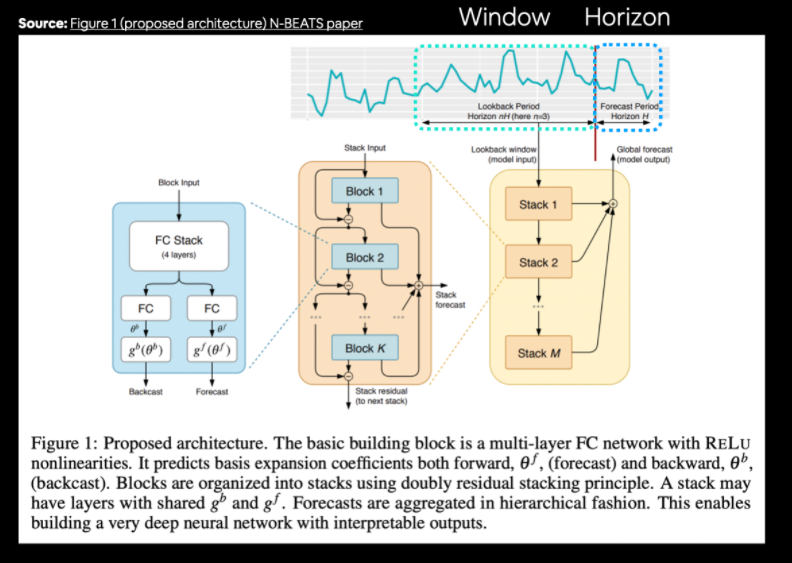



Using the same hyperparameters as the paper which can be found in Appendix D of the N-BEATS paper

Doing this will give us an opportunity to practice:

* Creating a custom layer for the NBeatsBlock by subclassing tf.keras.layers.Layer
* Creating a custom layer is helpful for when TensorFlow doesn't already have an existing implementation of a layer or if you'd like to make a layer configuration repeat a number of times (e.g. like a stack of N-BEATS blocks)
* Implementing a custom architecture using the Functional API
* Finding a paper related to our problem and seeing how it goes

>🔑**Note:** As you see in the paper, the authors state:"N-BEATS is implemented and trained in TensorFlow", that's what we going to do.

### Building and testing the N-BEATS block layer

Because the N-BEATS block layer doesn't exist in the TensorFlow, we've got to create it.

To create custom layers and models in TensorFlow we can use subclasses.



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
# Create N-BEATS custom layer
class NBeatsBlock(tf.keras.layers.Layer): # inherite the tf.keras.layers.Layer class
  def __init__(self,
               input_size:int,
               theta_size:int,
               horizon:int,
               n_neurons:int,
               n_layers:int,
               **kwargs): # the **kwargs argument takes care all of the arguments of the parent class (input_shape, trainable,...)
    super().__init__(**kwargs) # call the constructor of super class
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers
  # Block contains stack of fully connected layers each has Relu activation
    self.hidden = [tf.keras.layers.Dense(self.n_neurons, activation="relu") for i in range(self.n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self,inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # out put the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Let's test our NBeatsBlock class

To do, we'll make some dummy inputs and outputs

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Set up dummy NBeatsBlock layer to represent inpuats and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast and forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be the same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0) 
dummy_inputs

In [ ]:
# Pass dummy inputs to dummy nbeats block layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are activation output of the theta layer (they'll be random due to no trainning of the model)
print(f"Backcast {tf.squeeze(backcast.numpy())},\n Forecast: {tf.squeeze(forecast.numpy())}")

### Preparing datat for N-BEATS algorithm using `tf.data`



In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Prices+{i+1}"] = bitcoin_prices["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_nbeats.dropna()["Price"].astype(np.float32)

# split data into train and test sets
split_size = int(0.8 * len(X))
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

Train and test sets ready to go!

Now let's convert them into TensorFlow tf.data.Dataset's to ensure they run as fast as possible whilst training.

We'll do this by:

1. Turning the arrays in tensor Datasets using tf.data.Dataset.from_tensor_slices()

>Note: from_tensor_slices() works best when your data fits in memory, for extremely large datasets, you'll want to look into using the TFRecord format

2. Combine the labels and features tensors into a Dataset using tf.data.Dataset.zip()

3. Batch and prefetch the Datasets using batch() and prefetch()

4. Batching and prefetching ensures the loading time from CPU (preparing data) to GPU (computing on data) is as small as possible

In [ ]:
# 1. Turning the arrays into tensor 
train_feature_ds = tf.data.Dataset.from_tensor_slices(X_train)
train_label_ds = tf.data.Dataset.from_tensor_slices(y_train)

test_feature_ds = tf.data.Dataset.from_tensor_slices(X_test)
test_label_ds = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine the features and labels
train_ds = tf.data.Dataset.zip((train_feature_ds, train_label_ds))
test_ds = tf.data.Dataset.zip((test_feature_ds, test_label_ds))

# 3. Batching and prefetching
train_ds = train_ds.batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(32).prefetch(tf.data.AUTOTUNE)

train_ds, test_ds

### Setting up hyperparameter for N-BEATS algorithm

>📖 Resource: The following hyperparameters are taken from Figure 1 and Table 18/Appendix D of the [N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf)

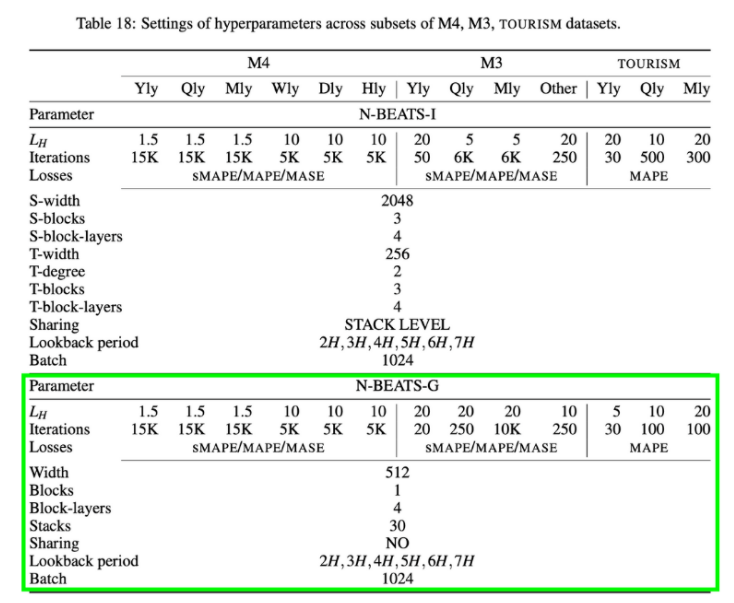

>🔑**Note**: If you see variables in a machine learning example in all caps, such as "N_EPOCHS = 100", these variables are often hyperparameters which are used through the example. You'll usually see them instantiated towards the start of an experiment and then used throughout.

In [ ]:
# Values from N-BEATS paper figure 1 and table 18/Appendix D
N_EPOCHS = 5000 # called "Interations" 
N_NEURONS = 512 # called "Width"
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = WINDOW_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

### Getting ready for residual connections

Beautiful! Hyperparameters ready, now before we create the N-BEATS model, there are two layers to go through which play a large roll in the architecture.

They're what make N-BEATS double residual stacking (section 3.2 of the [N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf)) possible:

* `tf.keras.layers.subtract(inputs)` - subtracts list of input tensors from each other
* `tf.keras.layers.add(inputs)` - adds list of input tensors to each other

In [ ]:
# Let's try them out
# make tensor
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add 
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Both of these layer functions are straight-forward, subtract or add together their inputs.

And as mentioned before, they're what powers N-BEATS double residual stacking.

The power of residual stacking or residual connections was revealed in [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) where the authors were able to build a deeper but less complex neural network (this is what introduced the popular [ResNet architecture](https://en.wikipedia.org/wiki/Residual_neural_network)) than previous attempts.

This deeper neural network led to state of the art results on the ImageNet challenge in 2015 and different versions of residual connections have been present in deep learning ever since.

A residual connection (also called skip connections) involves a deeper neural network layer receiving the outputs as well as the inputs of a shallower neural network layer.

In the case of N-BEATS, the architecture uses residual connections which:

Subtract the backcast outputs from a previous block from the backcast inputs to the current block
Add the forecast outputs from all blocks together in a stack

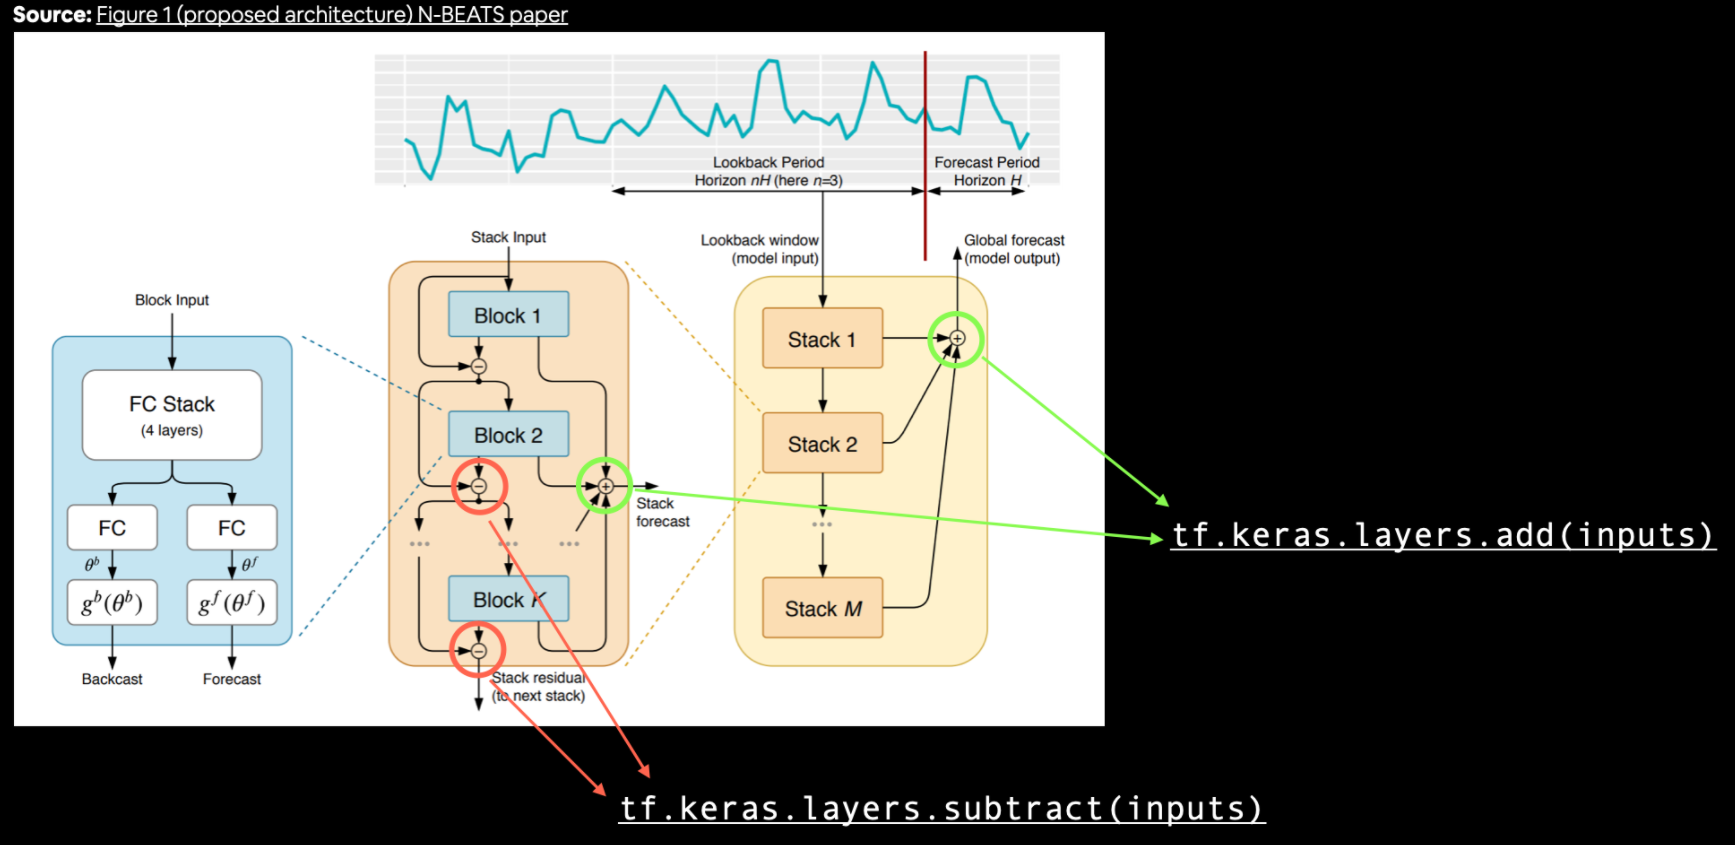

> What are benefits of residual connections?

In practice, residual connections have been beneficial for training deeper models (N-BEATS reaches ~150 layers, also see "These approaches provide clear advantages in improving the trainability of deep architectures" in section 3.2 of the [N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf).

It's thought that they help avoid the problem of [vanishing gradients](https://en.wikipedia.org/wiki/Vanishing_gradient_problem) (patterns learned by a neural network not being passed through to deeper layers).

### Building, compiling and fitting the N-BEATS algorithm

Let's going through the following:
1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack.
3. Make the inital backcast and forecast for the model with the layer created in (1).
4. Use a loop to create stack of block layers.
5. Use the `NBeatsBlock` class within the `for loop` (4) to create blocks which return backcasts and block-level forecasts.
6. Create the double residual stacking using subtract and add layers.
7. Put model inputs and outputs together using `tf.keras.Model()`.
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default settings as per section 5.2 of N-BEATS paper)
9. Fit the N-BEATS model for 5000 epochs,since it's fitting for so many epochs, we'll use a couple of callbacks:
* `tf.keras.callbacks.EarlyStopping()` - stop the model from training if it doesn't improve validation loss for 200 epochs and restore the best performing weights using restore_best_weights=True (this'll prevent the model from training for loooongggggg period of time without improvement)
* `tf.keras.callbacks.ReduceLROnPlateau()` - if the model's validation loss doesn't improve for 100 epochs, reduce the learning rate by 10x to try and help it make incremental improvements (the smaller the learning rate, the smaller updates a model tries to make)


In [ ]:
import tensorflow as tf
# Create callbacks
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                           patience=200,
                                                           verbose=1,
                                                           restore_best_weights=True)
reduce_lr_on_plateau_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                     verbose=1,
                                                                     patience=100)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Create the model
tf.random.set_seed(42)

# 1. set up the initial N-BEATS block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="Initial_Block")

# 2. create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="Stack_input")

# 3. create inital backcast and forecast 
residuals, forecast = nbeats_block_layer(stack_input)

# 4. create stacks of blocks:
for i in range(N_STACKS-1): # first stack already created in (3)
  backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name=f"NBEATS_Block_{i}")(residuals)
  # 6. create the double residuals for stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(stack_input, forecast, name="model_7_NBEATS")

# 8. Compile the model
model_7.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae", "mse"]
)

In [ ]:
model_7.summary()

In [ ]:
model_7_history = model_7.fit(train_ds,
                              epochs=N_EPOCHS,
                              validation_data=test_ds,
                              verbose=0,
                              callbacks=[early_stopping_callback,
                                         reduce_lr_on_plateau_callback])


Epoch 00220: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00324: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Restoring model weights from the end of the best epoch.

Epoch 00424: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00424: early stopping


In [ ]:
# evaluate on the whole test set
model_7.evaluate(test_ds)

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_ds)
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

In [ ]:
naive_results

🔥🔥🔥 Somehow we beat the naive model. But with a very large model.

### Plot the N-BEATS architecture

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_7)

>🔑 Note: Our N-BEATS model replicates the N-BEATS generic architecture, the training setups are largely the same, except for the N-BEATS paper used an ensemble of models to make predictions (multiple different loss functions and multiple different lookback windows), see Table 18 of the N-BEATS paper for more. An extension could be to setup this kind of training regime and see if it improves performance.

In [ ]:
# This will error out unless a "get_config()" method is implemented - this could be extra curriculum
model_7.save(model_7.name)

You'll notice a warning appears telling us to fully save our model correctly we need to implement a get_config() method in our custom layer class.

>📖 Resource: If you would like to save and load the N-BEATS model or any other custom or subclassed layer/model configuration, you should overwrite the get_config() and optionally from_config() methods. See the [TensorFlow Custom Objects](https://www.tensorflow.org/guide/keras/save_and_serialize#custom_objects) documentation for more.

## Model 8: Creating an ensemble (stacking different models together)

After all that effort, the N-BEATS algorithm's performance was underwhelming.

But again, this is part of the parcel of machine learning. Not everything will work.

That's when we refer back to the motto: experiment, experiment, experiment.

Our next experiment is creating an ensemble of models.

An ensemble involves training and combining multiple different models on the same problem. Ensemble models are often the types of models you'll see winning data science competitions on websites like Kaggle.

For example, in the N-BEATS paper, they trained an ensemble of models (180 in total, see section 3.4) to achieve the results they did using a combination of:

* Different loss functions (sMAPE, MASE and MAPE)
* Different window sizes (2 x horizon, 3 x horizon, 4 x horizon...)

The benefit of ensembling models is you get the "decision of the crowd effect". Rather than relying on a single model's predictions, you can [take the average or median of many different models](https://en.wikipedia.org/wiki/Ensemble_forecasting).

The keyword being: different.

It wouldn't make sense to train the same model 10 times on the same data and then average the predictions.

Fortunately, due to their random initialization, even deep learning models with the same architecture can produce different results.

What I mean by this is each time you create a deep learning model, it starts with random patterns (weights & biases) and then it adjusts these random patterns to better suit the dataset it's being trained on.

However, the process it adjusts these patterns is often a form of guided randomness as well (the SGD optimizer stands for stochastic or random gradient descent).

To create our ensemble models we're going to be using a combination of:

Different loss functions (MAE, MSE, MAPE)
Randomly initialized models
Essentially, we'll be creating a suite of different models all attempting to model the same data.

And hopefully the combined predictive power of each model is better than a single model on its own.

Let's find out!

We'll start by creating a function to produce a list of different models trained with different loss functions. Each layer in the ensemble models will be initialized with a random normal  [(Gaussian) distribution](https://en.wikipedia.org/wiki/Normal_distribution) using [He normal](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal) initialization, this'll help estimating the prediction intervals later on.

> 🔑 Note: In your machine leanring experiments, you may have already dealt with examples of ensemble models. Algorithms such as the [random forest](https://towardsdatascience.com/understanding-random-forest-58381e0602d2) model are a form of ensemble, it uses a number of randomly created decision trees where each individual tree may perform poorly but when combined gives great results.

### Construct and fitting an ensemble of models (using different loss function)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_ds,
                        test_data=test_ds,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae","mse","mape"]):
  """
  Return a list of num_iter models each trained on MAE, MSE, MAPE loss.

  For example, if num_iter=10, a list of 30 trained model will be returned:
  10 * len(["mae", "mse", "mape"])
  """  
  # Make an empty list for trained ensemble 
  ensemble_models = []

  # Create num_iter number of model per loss function
  for i in range(num_iter):
    # build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])
      # compile model
      model.compile(
          loss=loss_function,
          optimizer=tf.keras.optimizers.Adam(),
          metrics=["mae","mse"]
      )
      # fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[
                  tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                   patience=200,
                                                   restore_best_weights=True),
                  tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                       patience=100,
                                                       verbose=1)])
      ensemble_models.append(model)
  return ensemble_models 

>🔑**Note:** with ensembles, you'll generally find more models means better performance. However, this come with the tradeoff of having to train model for longer (longer training time), and make predictions with more model (longer prediction time).

In [ ]:
HORIZON

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 00267: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00367: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 00211: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00323: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00423: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 00169: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00269: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 00180: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00280: ReduceLROnPlateau reducing learning rate to 1.000000047497451

### Making predict with ensemble model

In [ ]:
# Create a function which use a list models return list of predictions
def make_ensemble_preds(ensemble_models,data):
  ensemble_preds=[]
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models, test_ds)
ensemble_preds

<tf.Tensor: shape=(15, 575), dtype=float32, numpy=
array([[ 8395.877,  8431.189,  8369.313, ..., 44672.855, 44701.58 ,
        46320.953],
       [ 8375.664,  8404.156,  8366.198, ..., 44348.887, 44876.42 ,
        46625.695],
       [ 8405.792,  8421.368,  8348.133, ..., 44712.88 , 44810.336,
        46444.477],
       ...,
       [ 8358.13 ,  8415.638,  8339.715, ..., 44921.812, 44692.867,
        46329.902],
       [ 8337.47 ,  8387.139,  8374.125, ..., 44197.434, 44698.586,
        46631.914],
       [ 8416.16 ,  8453.084,  8381.48 , ..., 45209.77 , 44711.812,
        46384.844]], dtype=float32)>

In [ ]:
ensemble_preds.shape

TensorShape([15, 575])

In [ ]:
y_preds = tf.math.reduce_mean(ensemble_preds, axis=0)
y_preds.shape

TensorShape([575])

Since we've trained 15 models, there are going be 15 sets of predictions. Rather than comparing every set of predictions to the ground truth, let's take the mean (you can also take the median)

In [ ]:
# Evaluate the ensembles model(s) prediction
ensemble_results = evaluate_preds(y_true=y_test, y_pred=tf.math.reduce_mean(ensemble_preds, axis=0))
ensemble_results

{'mae': 729.1341,
 'mape': 2.7471333,
 'mase': 0.9982285,
 'mse': 1517874.1,
 'rmse': 1232.0204}

In [ ]:
naive_results

{'mae': 728.4441,
 'mape': 2.7126303,
 'mase': 0.99886143,
 'mse': 1516791.8,
 'rmse': 1231.581}

### Plotting the prediction intervals (uncertainty estimates)

While giving a set of `WINDOW_SIZE=7`, the model will predict `HORIZON=1`.

But what more helpful than a single value? Perhaps a range of value.

Knowing the range of values a model is predicting may help you make better predictions for your forecast.

You'd know that although the model is predicting **50,000USD** (a point prediction, or single value in time), the value could actually be within the range **48,000USD**to **52,000USD** (of course, the value could also be outside of this range as well, but we'll get to that later).

These kind of prediction ranges are called **prediction intervals** or **uncertainty estimates**. And they're often as important as the forecast itself.

Because point predictions are almost always going to be wrong. So having a range of values can help with decision making.

>📖 Resource(s):
* The steps we're about to take have been inspired by the Machine Learning Mastery blog post [Prediction Intervals for Deep Learning Neural Networks](https://machinelearningmastery.com/prediction-intervals-for-deep-learning-neural-networks/). Check out the post for more options to measure uncertainty with neural networks.
* For an example of uncertainty estimates being used in the wild, I'd also refer to [Uber's Engineering Uncertainty Estimation in Neural Networks for Time Series Prediction](https://eng.uber.com/neural-networks-uncertainty-estimation/) at Uber blog post.

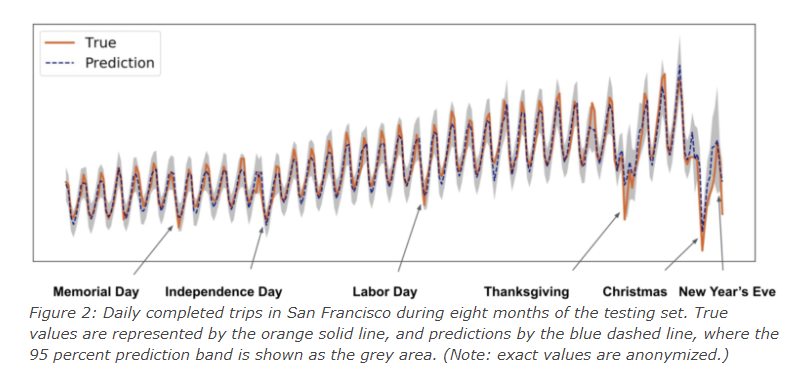

One way of getting the 95% condfidnece prediction intervals for a deep learning model is the bootstrap method:

1. Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble model)
2. Measure the standard deviation of the predictions
3. Multiply standard deviation by [1.96](https://en.wikipedia.org/wiki/1.96) (assuming the distribution is Gaussian, 95% of observations fall within 1.96 standard deviations of the mean, this is why we initialized our neural networks with a normal distribution)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

In [ ]:
# Let's create a function to find upper bound and lower bound of our ensembles model
def get_upper_lower(preds): # 1. Take the predictions

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the std by 1.96
  interval = std * 1.96 # https://en.wikipedia.org/wiki/1.96

  # 4. Get the prediction interval 
  preds_mean = tf.math.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [ ]:
lower, upper = get_upper_lower(preds=ensemble_preds)
lower.shape, upper.shape

(TensorShape([575]), TensorShape([575]))

Wonderful, let's plot the confident interval against our ensembles predictions.

To do so, we can use our plotting function as well as the [matplotlib.pyplot.fill_between()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) method to shade in the space between the upper and lower bounds.

In [ ]:
# lower[offset:].shape, upper[offset:].shape, X_test.index[offset:].shape, ensemble_mean[offset:].shape, y_test[offset:].shape

NameError: ignored

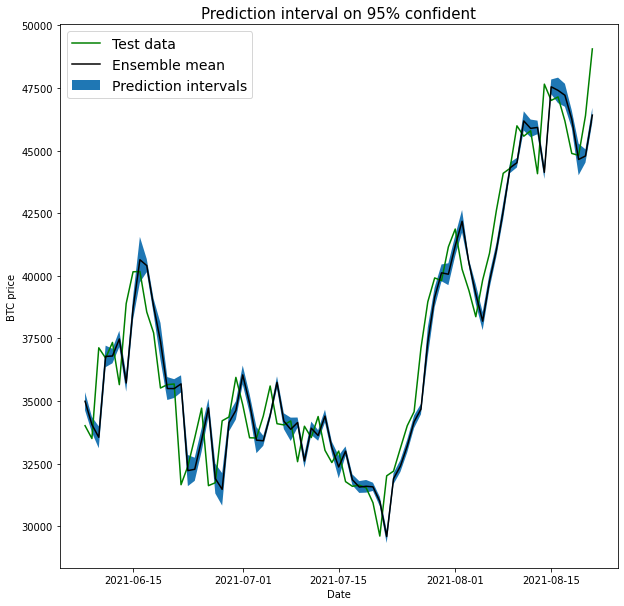

In [ ]:
# get the mean values of our ensemble preds
ensemble_mean = tf.math.reduce_mean(ensemble_preds, axis=0)

# Plot the mean of our ensembles preds along with the prediction intervals 
offset = 500
plt.figure(figsize=(10,10))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test data")
plt.plot(X_test.index[offset:], ensemble_mean[offset:], "k-", label="Ensemble mean")
plt.fill_between(X_test.index[offset:],
                 lower[offset:],
                 upper[offset:],
                 label="Prediction intervals")
plt.xlabel("Date")
plt.ylabel("BTC price")
plt.legend(loc="upper left", fontsize=14)
plt.title("Prediction interval on 95% confident", fontsize=15)
plt.show()

What can you tell about the ensemble model from the plot above?

It looks like the ensemble predictions are lagging slightly behind the actual data.

And the prediction intervals are fairly low throughout.

The combination of lagging predictions as well as low prediction intervals indicates that our ensemble model may be overfitting the data, meaning it's basically replicating what a naïve model would do and just predicting the previous timestep value for the next value.

This would explain why previous attempts to beat the naïve forecast have been futile.

🔑 Note: Our prediction intervals assume that the data we're using come from a Gaussian/normal distribution (also called a bell curve), however, open systems rarely follow the Gaussian. We'll see this later on with the turkey problem 🦃. For further reading on this topic, I'd recommend reading [The Black Swan by Nassim Nicholas Taleb](https://en.wikipedia.org/wiki/The_Black_Swan:_The_Impact_of_the_Highly_Improbable), especially Part 2 and Chapter 15.

## Aside: Two type of uncertainty (coconut and subway)

Inheritly, you know you cannot predict the future.

That doesn't mean trying to isn't valuable.

For many things, future predictions are helpful. Such as knowing the bus you're trying to catch to the library leaves at 10:08am. The time 10:08am is a point prediction, if the bus left at a random time every day, how helpful would it be?

Just like saying the price of Bitcoin tomorrow will be 50,000USD is a point prediction.

However, as we've discussed knowing a prediction interval or uncertainty estimate can be as helpful or even more helpful than a point prediction itself.

Uncertainty estimates seek out to qualitatively and quantitatively answer the questions:

What can my model know? (with perfect data, what's possible to learn?)
What doesn't my model know? (what can a model never predict?)

#### Aleatoric and Epistemic uncertainty


There are two types of uncertainty in machine learning you should be aware of:

* **Aleatoric** uncertainty - this type of uncertainty cannot be reduced, it is also referred to as "data" or "subway" uncertainty.

> Let's say your train is scheduled to arrive at 10:08am but very rarely does it arrive at exactly 10:08am. You know it's usually a minute or two either side and perhaps up to 10-minutes late if traffic is bad. Even with all the data you could imagine, this level of uncertainty is still going to be present (much of it being noise).
When we measured prediction intervals, we were measuring a form of subway uncertainty for Bitcoin price predictions (a little either side of the point prediction).


* **Epistemic** uncertainty - this type of uncertainty can be reduced, it is also referred to as "model" or "coconut" uncertainty, it is very hard to calculate.

> The analogy for coconut uncertainty involves whether or not you'd get hit on the head by a coconut when going to a beach.
If you were at a beach with coconuts trees, as you could imagine, this would be very hard to calculate. How often does a coconut fall of a tree? Where are you standing?
But you could reduce this uncertainty to zero by going to a beach without coconuts (collect more data about your situation).
Model uncertainty can be reduced by collecting more data samples/building a model to capture different parameters about the data you're modelling.

#### Uncertainty in Dating

Let's say you're going on a First Date Feedback Radio Show to help improve your dating skills.

Where you go on a blind first date with a girl (feel free to replace girl with your own preference) and the radio hosts record the date and then playback snippets of where you could've improved.

And now let's add a twist.

Last week your friend went on the same show. They told you about the girl they met and how the conversation went.

Because you're now a machine learning engineer, you decide to build a machine learning model to help you with first date conversations.

What levels of uncertainty do we have here?

From an aleatory uncertainty (data) point of view, no matter how many conversations of first dates you collect, the conversation you end up having will likely be different to the rest (the best conversations have no subject and appear random).

From an epistemic uncertainty (model) point of view, if the date is truly blind and both parties don't know who they're seeing until they meet in person, the epistemic uncertainty would be high. Because now you have no idea who the person you're going to meet is nor what you might talk about.

However, the level of epistemic uncertainty would be reduced if your friend told about the girl they went on a date with last week on the show and it turns out you're going on a date with the same girl.

But even though you know a little bit about the girl, your aleatory uncertainty (or subway uncertainty) is still high because you're not sure where the conversation will go.

If you're wondering where above scenario came from, it happened to me this morning. Good timing right?

## Model 9: Model on the full dataset to make predictions on the futures

>🔑 Note: Forecasting models need to be retrained every time a forecast is made. Why? Because if Bitcoin prices are updated daily and you predict the price for tomorrow. Your model is only really valid for one day. When a new price comes out (e.g. the next day), you'll have to retrain your model to incorporate that new price to predict the next forecast.

#### Setup data

In [ ]:
# Let's get some data ready
bitcoin_prices_windowed.head()

Price block_reward    Price+1  ...  Price+5  Price+6  Price+7
Date                                           ...                           
2013-10-01  123.65499           25        NaN  ...      NaN      NaN      NaN
2013-10-02  125.45500           25  123.65499  ...      NaN      NaN      NaN
2013-10-03  108.58483           25  125.45500  ...      NaN      NaN      NaN
2013-10-04  118.67466           25  108.58483  ...      NaN      NaN      NaN
2013-10-05  121.33866           25  118.67466  ...      NaN      NaN      NaN

[5 rows x 9 columns]

In [ ]:
bitcoin_prices_windowed.tail()

Price block_reward  ...       Price+6       Price+7
Date                                   ...                            
2021-08-17  46181.730824         6.25  ...  45576.888880  45990.910066
2021-08-18  44887.242787         6.25  ...  45793.318934  45576.888880
2021-08-19  44811.634126         6.25  ...  44078.760673  45793.318934
2021-08-20  46395.796696         6.25  ...  47654.729022  44078.760673
2021-08-21  49061.847721         6.25  ...  47004.357461  47654.729022

[5 rows x 9 columns]

In [ ]:
# Train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2875, 2875)

In [ ]:
# Let's turn in to performance optimized TensorFlows Datasets
feature_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
label_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)
# combine feature and labels
dataset_all = tf.data.Dataset.zip((feature_dataset_all, label_dataset_all))
# Batch and prefecth for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-Beats paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>

#### Create Model 9: Similar to model 1

In [ ]:
# Create and compile the model
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

model_9.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae","mse"]
)

In [ ]:
model_9_history = model_9.fit(dataset_all,
                              epochs=100,
                              verbose=0)

#### Make prediction into the future

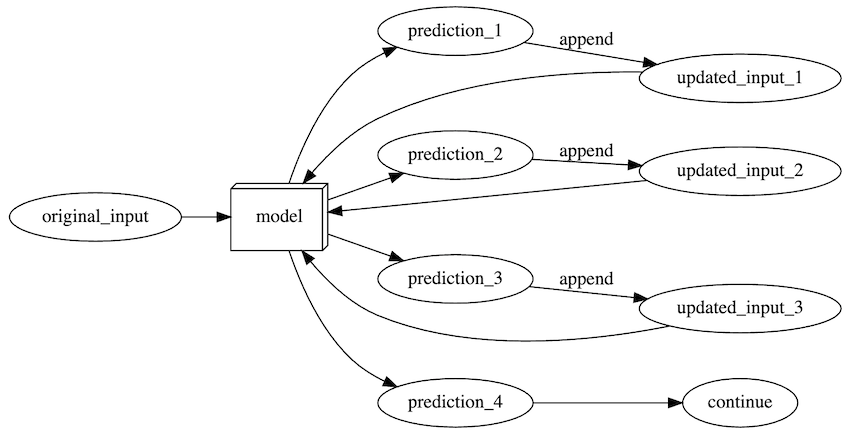

In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

In [ ]:
import numpy as np

# Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecast into_future steps values ends.
  
  Returns future forecast as list of float
  """
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  for _ in range(into_future):

    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    future_pred = tf.squeeze(future_pred).numpy()
    print(f"Predicting on:\n{last_window} -> Prediction: {future_pred}")

    future_forecast.append(future_pred)

    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  return future_forecast

In [ ]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts 
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

Predicting on:
[47004.35746057 47144.84256698 46181.73082365 44887.2427874
 44811.63412599 46395.79669554 49061.8477207 ] -> Prediction: 46749.35546875
Predicting on:
[47144.84256698 46181.73082365 44887.2427874  44811.63412599
 46395.79669554 49061.8477207  46749.35546875] -> Prediction: 46329.359375
Predicting on:
[46181.73082365 44887.2427874  44811.63412599 46395.79669554
 49061.8477207  46749.35546875 46329.359375  ] -> Prediction: 46026.7890625
Predicting on:
[44887.2427874  44811.63412599 46395.79669554 49061.8477207
 46749.35546875 46329.359375   46026.7890625 ] -> Prediction: 45908.85546875
Predicting on:
[44811.63412599 46395.79669554 49061.8477207  46749.35546875
 46329.359375   46026.7890625  45908.85546875] -> Prediction: 46132.9921875
Predicting on:
[46395.79669554 49061.8477207  46749.35546875 46329.359375
 46026.7890625  45908.85546875 46132.9921875 ] -> Prediction: 47722.05078125
Predicting on:
[49061.8477207  46749.35546875 46329.359375   46026.7890625
 45908.85546875

#### Plot the prediction into the future

In [ ]:
# Get dates
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify the start date, "D" stand for date
  end_date = start_date + np.timedelta64(into_future, "D") # specify the end date
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [ ]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-08-21 00:00:00')

In [ ]:
next_time_steps = get_future_dates(last_timestep, INTO_FUTURE)
next_time_steps

array(['2021-08-22', '2021-08-23', '2021-08-24', '2021-08-25',
       '2021-08-26', '2021-08-27', '2021-08-28', '2021-08-29',
       '2021-08-30', '2021-08-31', '2021-09-01', '2021-09-02',
       '2021-09-03', '2021-09-04'], dtype='datetime64[D]')

In [ ]:
# Insert last timestep/final price to the graph so it doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, bitcoin_prices["Price"][-1])

next_time_steps, future_forecast

(array(['2021-08-21', '2021-08-22', '2021-08-23', '2021-08-24',
        '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-28',
        '2021-08-29', '2021-08-30', '2021-08-31', '2021-09-01',
        '2021-09-02', '2021-09-03', '2021-09-04'], dtype='datetime64[D]'),
 array([49061.848, 46749.355, 46329.36 , 46026.79 , 45908.855, 46132.992,
        47722.05 , 48142.754, 46482.99 , 46310.535, 46643.832, 46771.797,
        47092.07 , 47962.527, 47570.406], dtype=float32))

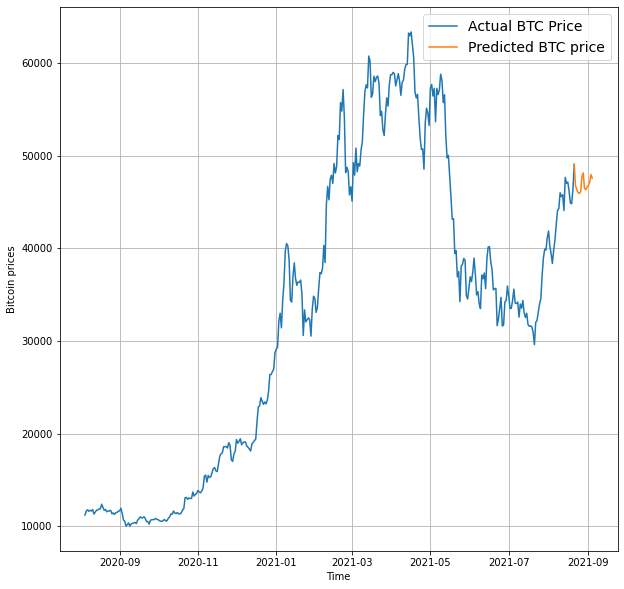

In [ ]:
plt.figure(figsize=(10,10))
plot_time_series(bitcoin_prices.index, bitcoin_prices["Price"].to_numpy(), start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC price")

>🔑 Note: A reminder, the predictions we've made here are not financial advice. And by now, you should be well aware of just how poor machine learning models can be at forecasting values in an open system - anyone promising you a model which can "beat the market" is likely trying to scam you, oblivious to their errors or very lucky.

## Model 10: Why forecasting is BS (the turkey problem)

When creating any kind of forecast, you must keep the turkey problem in mind.

The turkey problem is an analogy for when your observational data (your historical data) fails to capture a future event which is catostrophic and could lead you to ruin.

The story goes, a turkey lives a good life for 1000 days, being fed every day and taken care of by its owners until the evening before Thanksgiving.

Based on the turkey's observational data, it has no reason to believe things shouldn't keep going the way they are.

In other words, how could a turkey possibly predict that on day 1001, after 1000 consectutive good days, it was about to have a far from ideal day.

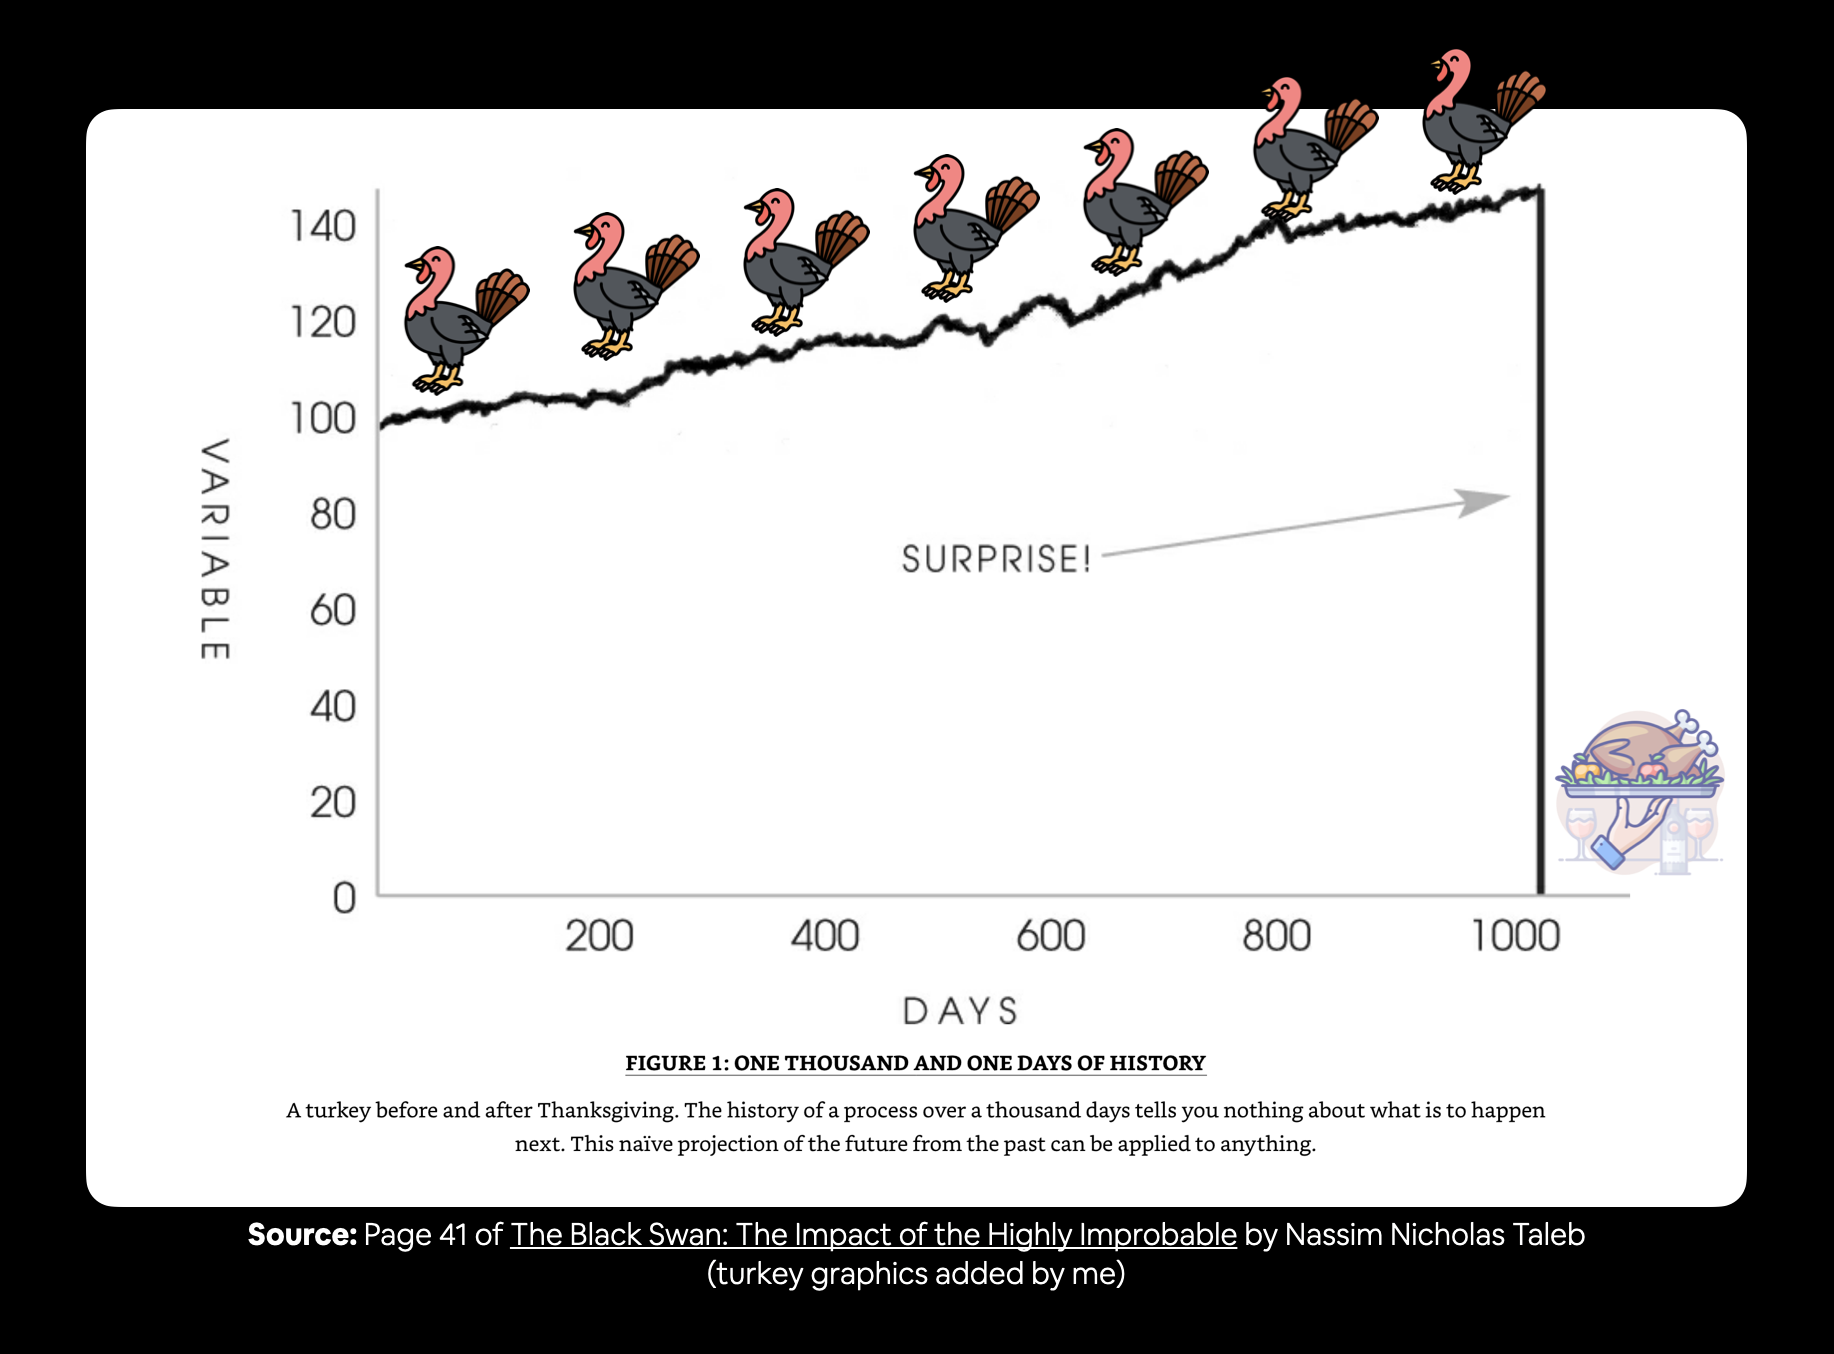

How does this relate to predicting the price of Bitcoin (or the price of any stock or figure in an open market)?

You could have the historical data of Bitcoin for its entire existence and build a model which predicts it perfectly.

But then one day for some unknown and unpredictable reason, the price of Bitcoin plummets 100x in a single day.

Of course, this kind of scenario is unlikely.

But that doesn't take away from its significance.

Think about it in your own life, how many times have the most significant events happened seemingly out of the blue?

As in, you could go to a cafe and run into the love of your life, despite visiting the same cafe for 10-years straight and never running into this person before.

The same thing goes for predicting the price of Bitcoin, you could make money for 10-years straight and then lose it all in a single day.

It doesn't matter how many times you get paid, it matters the amount you get paid.

>📖 Resource: If you'd like to learn more about the turkey problem, I'd recommend the following:
* [Explaining both the XIV trade and why forecasting is B](https://youtu.be/hRwimmE2wEk)S by Nassim Taleb
* [The Black Swan](https://en.wikipedia.org/wiki/The_Black_Swan:_The_Impact_of_the_Highly_Improbable) by Nassim Taleb (epsecially Chapter 4 which outlines and discusses the turkey problem)

>🔑 Note: A very unlikely and unpredictable event such as the price of Bitcoin falling 100x in a single day (note: the adjective "unlikely" is based on the historical price changes of Bitcoin) is also referred to a Black Swan event. A Black Swan event is an unknown unknown, you have no way of predicting whether or not it will happen but these kind of events often have a large impact.

In [ ]:
# Let's introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = bitcoin_prices["Price"].to_numpy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
# Manufacture an extra price on the end (to showcase the Turkey problem)
btc_price_turkey[-10:]

array([45793.31893432, 44078.76067268, 47654.72902173, 47004.35746057,
       47144.84256698, 46181.73082365, 44887.2427874 , 44811.63412599,
       46395.79669554,   490.61847721])

In [ ]:
# Get the timesteps for the turkey problem 
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-08-12T00:00:00.000000000', '2021-08-13T00:00:00.000000000',
       '2021-08-14T00:00:00.000000000', '2021-08-15T00:00:00.000000000',
       '2021-08-16T00:00:00.000000000', '2021-08-17T00:00:00.000000000',
       '2021-08-18T00:00:00.000000000', '2021-08-19T00:00:00.000000000',
       '2021-08-20T00:00:00.000000000', '2021-08-21T00:00:00.000000000'],
      dtype='datetime64[ns]')

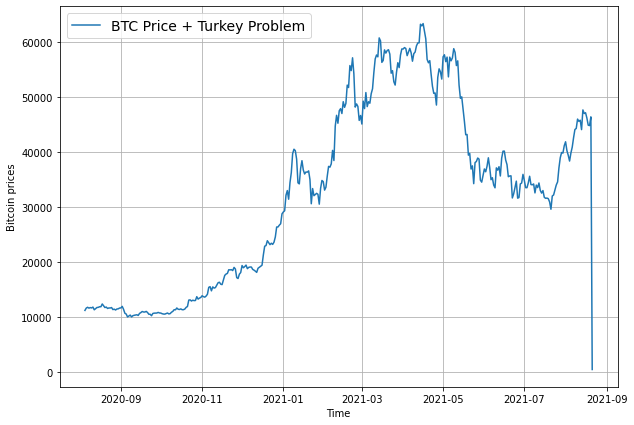

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey, 
                 values=btc_price_turkey, 
                 format="-", 
                 label="BTC Price + Turkey Problem", 
                 start=2500)

#### Create a data for turket model

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2300, 575, 2300, 575)

In [ ]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


In [ ]:
# Evaluate turkey model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 949.4258


949.42578125

In [ ]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 803.0977


803.0977172851562

#### Evaluate the model


In [ ]:
# Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8390.096, 8404.168, 8333.316, 8521.105, 8846.59 , 9128.128,
       9348.448, 9561.938, 9447.03 , 9383.889], dtype=float32)>

In [ ]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 19134.82,
 'mape': 124.476265,
 'mase': 23.74762,
 'mse': 618624960.0,
 'rmse': 24283.814}

In [ ]:
model_1_results

{'mae': 735.9027,
 'mape': 2.7693985,
 'mase': 1.0074952,
 'mse': 1544236.0,
 'rmse': 1242.673}

🔥🔥🔥By changing just one value, the turkey_model MAE increases almost 30x over model_1.

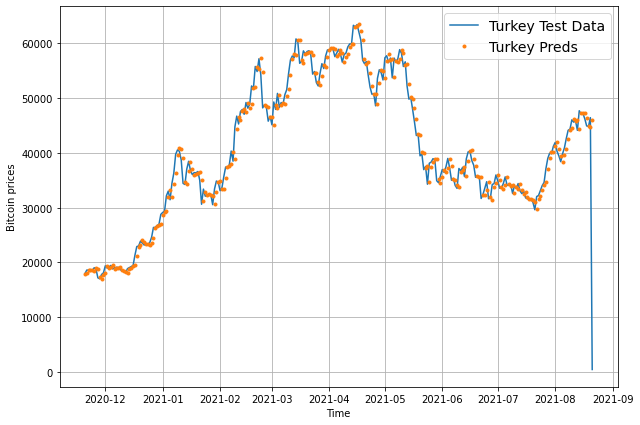

In [ ]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):], 
                 values=btc_price_turkey[-len(y_test):], 
                 format="-", 
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds, 
                 label="Turkey Preds", 
                 start=offset);

Why does this happen?

Why does our model fail to capture the turkey problem data point?

Think about it like this, just like a turkey who lives 1000 joyful days, based on observation alone has no reason to believe day 1001 won't be as joyful as the last, a model which has been trained on historical data of Bitcoin which has no single event where the price decreased by 100x in a day, has no reason to predict it will in the future.

A model cannot predict anything in the future outside of the distribution it was trained on.

In turn, highly unlikely price movements (based on historical movements), upward or downward will likely never be part of a forecast.

However, as we've seen, despite their unlikeliness, these events can have huuuuuuuuge impacts to the performance of our models.

## Compare Models

In [ ]:
import pandas as pd

model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

mae           mse  ...        mape       mase
naive_model             728.444092  1.516792e+06  ...    2.712630   0.998861
model_1_dense_w7_h1     735.902710  1.544236e+06  ...    2.769398   1.007495
model_2_dense_w30_h1    779.694824  1.672420e+06  ...    2.936961   1.062259
model_3_dense_w30_h7   1589.185913  7.330516e+06  ...    5.920210   2.181361
model_4_CONV1D          728.339600  1.524461e+06  ...    2.718831   0.997141
model_5_LSTM            735.411682  1.546918e+06  ...    2.744271   1.006823
model_6_multivariate    730.324707  1.526298e+06  ...    2.742620   0.999859
model_8_NBEATs          728.045105  1.516525e+06  ...    2.738972   0.996738
model_9_ensemble        729.134094  1.517874e+06  ...    2.747133   0.998228
model_10_turkey       19134.820312  6.186250e+08  ...  124.476265  23.747620

[10 rows x 5 columns]

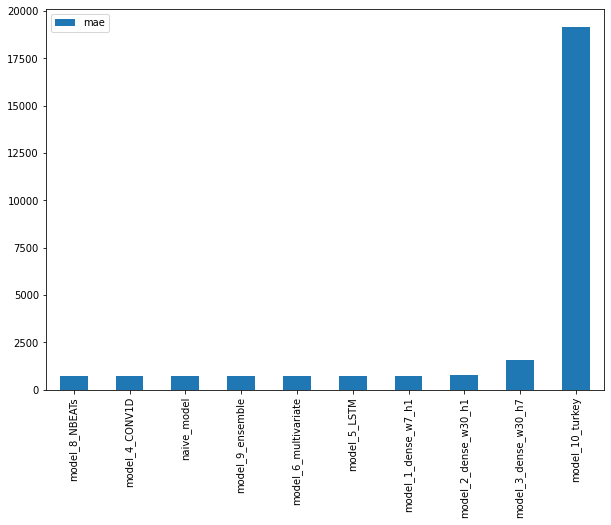

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");

The majority of our deep learning models perform on par or only slightly better than the naive model. And for the turkey model, changing a single data point destroys its performance.

> 🔑 Note: Just because one type of model performs better here doesn't mean it'll perform the best elsewhere (and vice versa, just because one model performs poorly here, doesn't mean it'll perform poorly elsewhere).

As I said at the start, this is not financial advice.

After what we've gone through, you'll now have some of the skills required to callout BS for any future tutorial or blog post or investment sales guide claiming to have model which is able to predict the futrue.